# Requirements

A new project on data you gathered yourself. Existing datasets are OK but have a higher bar in terms of difficulty

The project is deployed in some form -- it's not a static notebook, but has a server component.

Your model must be trained and saved. We do not want to see your model being trained everytime we present it with new data.

The project can be analysis/visualization or a model. If it's a model you should build an inference server for it taking JSON. If it's an analysis you can build a presentation page using something like https://dash.plotly.com/

Submit the project on your own repo and you will present your project to your instructors

NOTE Stock predicting models will not be accepted as final projects

# INSTALLS

In [ ]:
#  python -m venv ds_project
#  source venv/bin/activate

#  pip install pipreqs
#  pipreqs
#  pipreqs --force #update requirements
#  pip freeze
#  #after downloading a new project
#  pip install -r requirements.txt # If pip doesn’t work, try pip3
# !pip install visualkeras
 
#  rm -rf venv #delete venv
#  deactivate #deactivate venv
# ipython kernel install --user --name=ds_project # Install a Jupyter kernel in your virtual environment
# jupyter notebook # open notebook
# jupyter kernelspec list #see the available kernels that have been set up
# jupyter kernelspec uninstall venv # remove a previously installed kernel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 42.0 MB/s eta 0:00:00


In [1]:

#!pip3 install --upgrade numpy==1.23
#!pip install opencv-python
#!pip install dlib
#!pip install face-recognition

!pip install livelossplot
#!pip install retinaface

#!pip install flask-ngrok


#!pip uninstall retinaface #<<<<< DO NOT IMPORT: has conlficts with tensoflow imports
#!pip uninstall keras
#!pip uninstall tensorflow

#!pip install tensorflow    #Use ==2.7  if graph error during fitting
#!pip install keras         #Use ==2.7  if graph error during fitting

!pip install keras-tuner -q

!pip install tqdm

#!pip install snscrape

#!pip install jsonlines

!pip install insta-scrape



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORTS 

In [2]:
#IMPORTS 

import os
import numpy as np 
import pandas as pd 


from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, f1_score, recall_score
from sklearn.neural_network import MLPClassifier  # Mulitple Layer of hidden Layers Perceptron

#NN libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Input, Lambda,Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from keras import layers,initializers
from keras.callbacks import ReduceLROnPlateau


from keras import utils
from keras.backend import count_params
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

import keras_tuner

#image processing
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image as PIL_Image
from keras.preprocessing import image as keras_image
from keras.preprocessing.image import ImageDataGenerator



# NN Pre-Trained model
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet_v2 import ResNet50V2

from keras.regularizers import l2

# FaceFeatures detection
import cv2 
import dlib
import imutils
from imutils import face_utils
import argparse

#from retinaface import RetinaFace

#web
#from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template, redirect, url_for

#saving
import pickle

# Use Keras Flow_from_directory to fit KNN
import tqdm
#Model architecture visualization
#import visualkeras



2.12.0
2.12.0


# COLAB : GPU + DATASET ACCESSES

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# USE of GPU
tf.config.list_logical_devices('GPU')

device_name = tf.test.gpu_device_name()

if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


# PATHS and VARIABLES

In [5]:
#local paths
#path_FER = '/Users/Sam/Documents/2-Learning/5-DataScience/concordia-bootcamps/CAPSTONE PROJECT/datasets/FER_2013_dataset/'

#colab paths
#path_FER = '/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/'
path_FER_BIG = '/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset_BIG/'
path_FER_2013_CROPFACES = '/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_CROPFACES/'
#colab saved models
path_models = '/content/drive/MyDrive/CP_Emotion_Recog/savedmodels/'

path_lib = '/content/drive/MyDrive/CP_Emotion_Recog/library/'


# variables
IMG_SIZE = [48,48,3]
#IMG_SIZE = [224,224,3]
epochs = 90
num_classes = 7 # To check : trainings.classes
batch_size = 128





# PRE-PROCESSING Functions: Not Used

Libraries: OpenCV, DLib, RetinaFace

In [ ]:
dlib.load_rgb_image(access_img).shape

(48, 48, 3)

In [ ]:


def blackbackground(image):
  datFile =  path_lib + 'shape_predictor_68_face_landmarks.dat'
  face_detector = dlib.get_frontal_face_detector()
  facelandmarks = dlib.shape_predictor(datFile)


  #either np.array via (Flow from directory)
  if isinstance(image, np.ndarray):
    print('image.shape:',image.shape)
    
    img = PIL_Image.fromarray(image.astype(np.uint8))
    

    #img = PIL_Image.fromarray(image)
    faces = face_detector(img,1) #get the faces coordinates: rectangles[[(x1, y1) (x2, y2)]],  upsample (to make picture bigger)
    

  else:
    #either direct path access (user call)
    print('image path:',image)
    img = dlib.load_rgb_image(image) #RGB
    faces = face_detector(img,1) #get the faces coordinates: rectangles[[(x1, y1) (x2, y2)]],  upsample (to make picture bigger)




  # print('CROPFACE INPUT type: ', type(image))
  # print('CROPFACE INPUT len: ', len(image))
  # print('CROPFACE INPUT: ', image)
  

  
  #img = cv2.imread(image)[:,:,::-1] #BGR then reversed
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  

  

  base_img = img.copy()
  landmarks = facelandmarks(base_img, faces[0])
  print(landmarks)

  landmarks_tuple = []
  for n in range(0, 27):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmarks_tuple.append((x, y))
      cv2.circle(base_img, (x, y), 2, (255, 255, 255), -1)
  #plt.imshow(base_img)


  # Defining the route around the face
  routes = []

  for i in range(15, -1, -1):
      from_coordinate = landmarks_tuple[i+1]
      to_coordinate = landmarks_tuple[i]
      routes.append(from_coordinate)

  from_coordinate = landmarks_tuple[0]
  to_coordinate = landmarks_tuple[17]
  routes.append(from_coordinate)

  for i in range(17, 20):
      from_coordinate = landmarks_tuple[i]
      to_coordinate = landmarks_tuple[i+1]
      routes.append(from_coordinate)

  from_coordinate = landmarks_tuple[19]
  to_coordinate = landmarks_tuple[24]
  routes.append(from_coordinate)

  for i in range(24, 26):
      from_coordinate = landmarks_tuple[i]
      to_coordinate = landmarks_tuple[i+1]
      routes.append(from_coordinate)

  from_coordinate = landmarks_tuple[26]
  to_coordinate = landmarks_tuple[16]
  routes.append(from_coordinate)
  routes.append(to_coordinate)

  # applying a black mask on the picture to only get the face
  mask = np.zeros((img.shape[0], img.shape[1]))
  mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
  mask = mask.astype(np.bool)

  out = np.zeros_like(img) # Black image size of the image
  out[mask] = img[mask]  #out[mask]: areas of the face where True = image pixels where mask == True ( the face only)
  
  
  return out
  



<ipython-input-19-e8327fe1a559>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1 , 2, 1)


image path: /content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/train/angry/Training_1021836.jpg


<ipython-input-17-07ffba187a43>:87: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = mask.astype(np.bool)


(-0.5, 47.5, 47.5, -0.5)

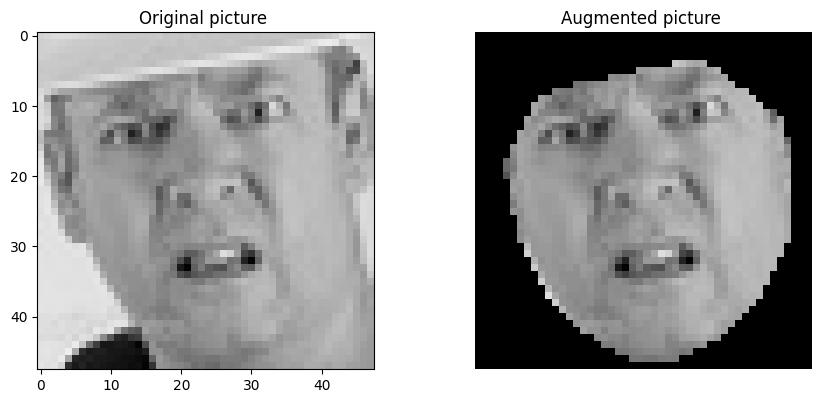

In [ ]:
#access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/train/angry/Training_1021836.jpg"
access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/train/happy/Training_1543443.jpg"

plt.subplots(figsize = (10 , 10))

plt.subplot(1 , 2, 1)
plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
plt.imshow(dlib.load_rgb_image(access_img))
plt.title('Original picture ') # Search which index has a bit set to 1 in the sparse matrice

plt.subplot(1 , 2, 2)
plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
plt.imshow(blackbackground(access_img))
plt.title('Augmented picture ') # Search which index has a bit set to 1 in the sparse matrice

plt.axis("off")

In [ ]:
 from google.colab.patches import cv2_imshow

#access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/train/angry/Training_1021836.jpg"
access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/facetestpic.jpg"
#access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/ballon_noFace_testpic.jpg"
# import the necessary packages

datFile =  path_lib + 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(datFile)

from PIL import Image

def cropface(image):
  
  detector = dlib.get_frontal_face_detector()
  # load the input image, resize it, and convert it to grayscale
  image = cv2.imread(image)
  
  im = imutils.resize(image, width=500)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # detect faces in the grayscale image
  rects = detector(gray, 1)
  
  # ----------------------- #

  print('len(rect):',len(rects))
  # loop over the face detections
  for (i, rect) in enumerate(rects):
    
    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # show the face number
    #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    #cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
  # show the output image with the face detections
  # ---------
    face = image[y:y+h, x:x+w]
    
    #change from nparray to .jpg, etc ... image format
    face = image[max(0,y):min(y+h,image.shape[0]), max(0,x):min(x+w,image.shape[1])]
    im = Image.fromarray(face)
  
    return im
    #cv2_imshow(face)
    #cv2.waitKey(0)

  # ---------


In [ ]:
#lookuplocation = path_FER_BIG + 'train/surprise'
#saveloc = path_FER_2013_CROPFACES + 'train/surprise'

count_im = 0
num_images = 0
for file in os.scandir(lookuplocation):
    count_im+=1
    print('COUNT IMG:',count_im )    
    print(f'current File: {file}')
    if file.is_file() and file.name[-4:]=='.jpg' and count_im>2000:
        file_path = f"{file.path}"
        print('IMAGE PATH:', file_path)
        with open (file_path, "r") as stream:
          print('stream:', stream.name)
          cropimage = cropface(stream.name)
          if cropimage is not None:
            os.chdir(path_FER_2013_CROPFACES) # change the current working directory
            print("CWD:", os.getcwd())
            save_path = os.path.join(saveloc, file.name) # specify the name of the file to be saved
            print('SAVE TO:', save_path)
            cropimage.save(save_path)
            num_images+=1
            print('TRANSFERED IMAGES: ', num_images)
              
          stream.close()

  
    



Streaming output truncated to the last 5000 lines.
current File: <DirEntry 'Training_47094572.jpg'>
COUNT IMG: 118
current File: <DirEntry 'Training_79079453.jpg'>
COUNT IMG: 119
current File: <DirEntry 'Training_58627068.jpg'>
COUNT IMG: 120
current File: <DirEntry 'Training_46578217.jpg'>
COUNT IMG: 121
current File: <DirEntry 'Training_29606355.jpg'>
COUNT IMG: 122
current File: <DirEntry 'Training_88212741.jpg'>
COUNT IMG: 123
current File: <DirEntry 'Training_89216287.jpg'>
COUNT IMG: 124
current File: <DirEntry 'Training_47936692.jpg'>
COUNT IMG: 125
current File: <DirEntry 'Training_91045206.jpg'>
COUNT IMG: 126
current File: <DirEntry 'Training_27791011.jpg'>
COUNT IMG: 127
current File: <DirEntry 'Training_39959891.jpg'>
COUNT IMG: 128
current File: <DirEntry 'Training_61425314.jpg'>
COUNT IMG: 129
current File: <DirEntry 'Training_92274884.jpg'>
COUNT IMG: 130
current File: <DirEntry 'Training_31299485.jpg'>
COUNT IMG: 131
current File: <DirEntry 'Training_92312755.jpg'>
COUN

# DATASET OVERVIEW

In [ ]:
#count files per folder of emotion
folders = ['train', 'test']


def checkcontent(folder):
  
    dirs = os.path.join(path_FER_2013_CROPFACES, folder) # path_FER_2013_CROPFACES # path_FER # path_FER_BIG
    subdirs = os.listdir(dirs)
    
    number_files = []
    for d in subdirs:
      if d=='.DS_Store':
        continue
      path_subdir = path_FER_2013_CROPFACES+folder+'/'+d
      files = os.listdir(path_subdir)
      number_files.append(len(files))
    if '.DS_Store' in subdirs:
      subdirs=subdirs[1:]
    print(' --------',folder,'--------')
    print(pd.DataFrame({'Emotions':subdirs,'NumberFiles':number_files}))
    
for f in folders:
  checkcontent(f)


 -------- train --------
   Emotions  NumberFiles
0     angry         2522
1      fear         2542
2     happy         5621
3   neutral         3728
4       sad         2663
5  surprise         2358
6   disgust          340
 -------- test --------
   Emotions  NumberFiles
0     angry           67
1   disgust           80
2      fear           53
3     happy           84
4   neutral           78
5       sad           56
6  surprise           73


# PRE-PROCESSING

In [ ]:
# preprocessing_function:
# function that will be applied on each input.
# The function will run after the image is resized and augmented.
# The function should take one argument: one image (Numpy tensor with rank 3),
#     and should output a Numpy tensor with the same shape. 

generator = ImageDataGenerator(
    preprocessing_function= None, #lambda x: tf.convert_to_tensor(x[:,:,:3]), #RGB
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,     #! 
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,   #!
    vertical_flip=False,    #!
    rescale=1.0/255,        #!
    data_format="channels_last", #(samples, height, width, channels)
    validation_split=0.2,   #!
    #interpolation_order=1, # Not to use with tensorflow --version<=2.7
    dtype=None
)

# IMAGE GENERATOR

In [ ]:
training = generator.flow_from_directory(
    path_FER_BIG + 'train/',
    target_size=IMG_SIZE[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='training',
    
)

validation = generator.flow_from_directory(
    path_FER_2013_CROPFACES + 'train/',
    target_size=IMG_SIZE[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    seed=0,
    shuffle=False,
    subset='validation',
    
)

testing = generator.flow_from_directory(
    path_FER_2013_CROPFACES + 'test/',
    target_size=IMG_SIZE[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    seed=0,
    shuffle=False,
    
    
)

Found 17824 images belonging to 7 classes.
Found 3952 images belonging to 7 classes.
Found 491 images belonging to 7 classes.


In [ ]:
training.class_indices


NameError: ignored

# DATASET IMAGES LOOK UP

FER-2013: 48x48 pixel grayscale images of faces

In [ ]:

emotion_labels = [e for e in training.class_indices]
image_titles = training.__next__() #Iterator gets the next images in each training folders

images = image_titles[0] # Images
titles = image_titles[1] # categorized titles into a Sparse matrix

def displayimages(emotion):

  plt.subplots(figsize = (10 , 10))
  h=0
  zp = zip(images,titles)
  for i, imag_emot in enumerate(zp):
    if emotion_labels[np.argmax(imag_emot[1],axis=0)]==emotion and h<=4:
      plt.subplot(1 , 5, h+1)
      plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
      plt.imshow(imag_emot[0])
      plt.title(f'Emotion: {emotion_labels[np.argmax(imag_emot[1],axis=0)]}') # Search which index has a bit set to 1 in the sparse matrice
      plt.axis("off")
      h+=1
    

<ipython-input-39-c1da40dae729>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1 , 5, h+1)


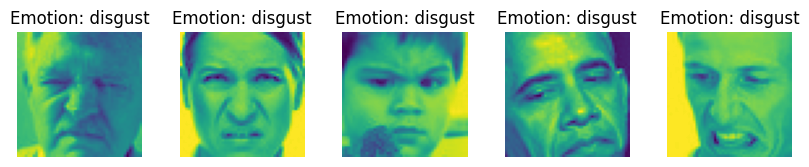

In [ ]:
from keras import utils
from PIL import Image
pth = path_FER_BIG + 'train/disgust'
plt.subplots(figsize = (10 , 10))
h=0

fl = os.listdir(pth)
for f in fl: 
  if h<=4:
    plt.subplot(1 , 5, h+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    img = Image.open(os.path.join(pth, f))
    plt.imshow(img)
    
    plt.title(f'Emotion: disgust') 
    plt.axis("off")
    h+=1


<ipython-input-28-f72e1d9ed6dc>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1 , 5, h+1)


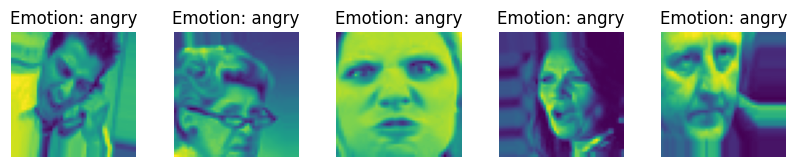

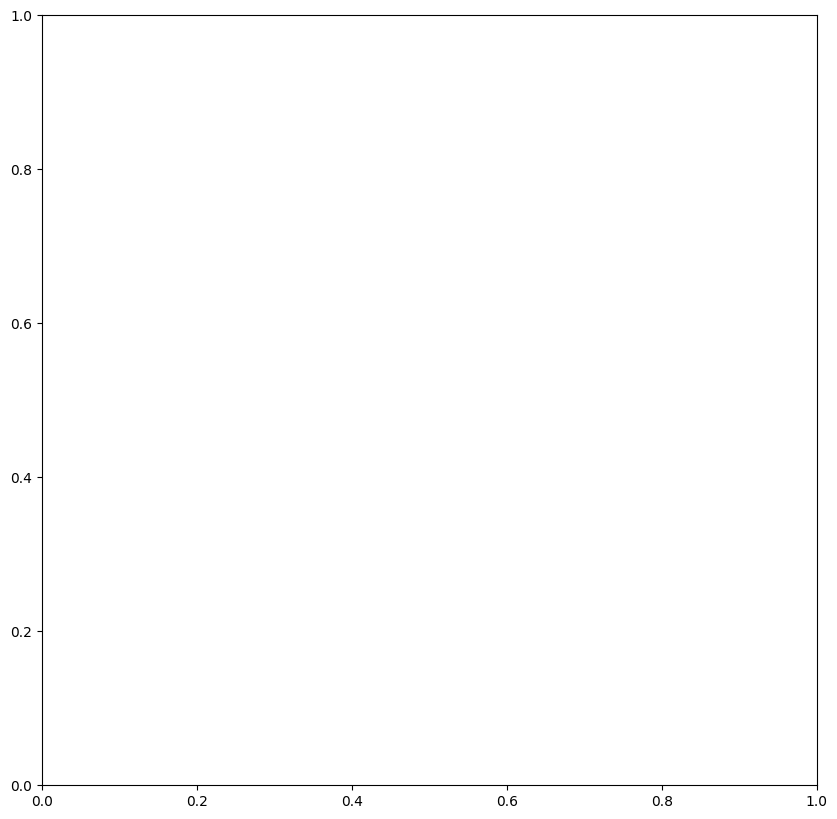

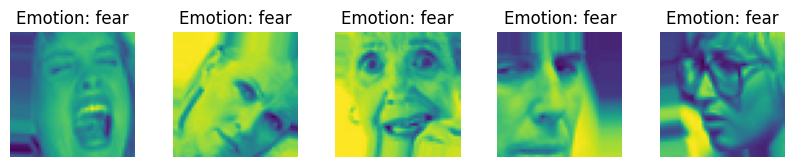

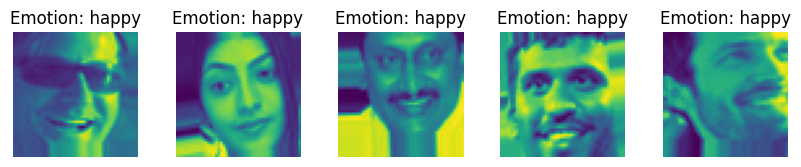

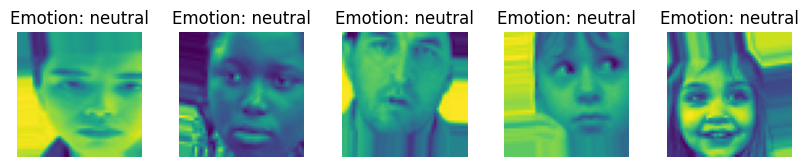

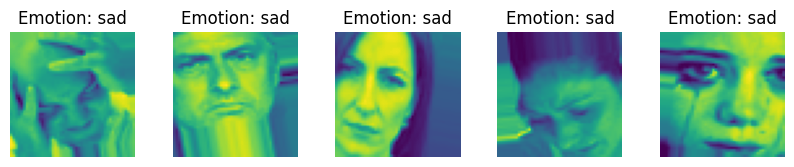

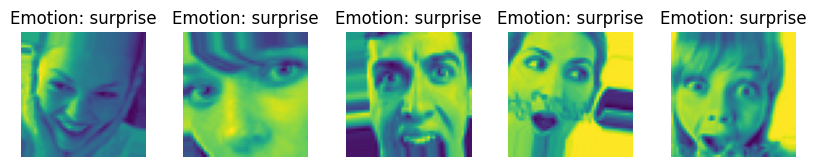

In [ ]:


for emo in emotion_labels:
  displayimages(emo)


# FUNCTIONS DEFINITION


In [6]:
# PLOT FUNCTIONS
def plot_loss_accuracy(history,model, save_pic=False):

    if type(history)==dict:
      dictio = history # After saving the fit history, the file is directly a dictionary
    else:
      dictio = history.history

    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    ax1.plot(dictio['loss'], label = 'Training Loss')
    ax1.plot(dictio['val_loss'], label = 'Validation Loss')
    ax1.set_title('Loss vs Epoch', fontsize = 11)
    ax1.legend()

    ax2.plot(dictio['accuracy'], label = 'Training Accuracy')
    ax2.plot(dictio['val_accuracy'], label = 'Validation Accuracy')
    ax2.set_title('Accuracy vs Epoch', fontsize = 11)
    ax2.legend();
    
    plt.show()
    #plt.savefig('Accuracy)


    loss, accuracy = model.evaluate(testing)
    print('Loss', loss)
    print('Accuracy', accuracy)
    
def classif_report(model, testing=testing, training = training):
    testing.reset()

    pred=model.predict_generator(testing,verbose=1)
    predicted_class_indices=np.argmax(pred,axis=1)
    emo_labels = (training.class_indices)

    print(classification_report(testing.classes, predicted_class_indices, target_names = emo_labels))

NameError: ignored

# TESTS specific Model / Image

In [ ]:
# access_img = "/content/drive/MyDrive/CP_Emotion_Recog/datasets/FER_2013_dataset/train/angry/Training_1021836.jpg"

# image = utils.load_img(access_img,grayscale=False,color_mode="rgb",target_size=IMG_SIZE[:2],interpolation="nearest",keep_aspect_ratio=False,)
# input_arr = utils.img_to_array(image)
# input_arr = np.array([input_arr])  # Convert single image to a batch.



In [ ]:
# with open(path_models+'model_11_pckl.pkl','rb') as f:
#   model_11tmp =pickle.load(f)  
# pred_11 = model_11tmp.predict(input_arr)
# pred_11

1/1 [==============================] - 8s 8s/step


array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# pred=model.predict_generator(testing,verbose=1)
# predicted_class_indices=np.argmax(pred,axis=1)
# emo_labels = (training.class_indices)

# TRIALS RECAPITULATION

## DATAFRAME

In [12]:
models = ['model_0','model_1','model_2','model_3','model_4','model_5','model_6','model_7','model_8','model_9','model_10','model_11','model_12','model_13','model_14','model_15','KNN','model_17','model_18', 'model_21']
accuracy = [0.16,0.2855,0.3305,0.3120,0.25,0.33,0.34,0.33,0.38,0.36,0.39,0.39,0.14,0.479,0.43,0.41,0.24,0.29,0.42, 0.61]
images = [28000, 28000,28000,28000,1400,1400,1400,2800,2800,2800,2800,4636,4636,4636,4636,6436,6436,6436,6436, 19774]
batches = [32,32,500,500,64,64,64,64,128,128,128,128,150,150,64,64,64,64,64,128]
Model_type=['VGG16','VGG16','CNN','CNN','VGG16','CNN','VGG16','VGG16','VGG16','VGG16','VGG16','VGG16','VGG16','MNetV2','MNetV2','MNetV2','KNN','MNetV2','RSNT50V2', 'CNN']
specificity = ['Flatten_7','Flatten_7','4Layers','3Layers','no_rec','5Layer_2FC','1FC','2FC_DO_REGUL','1FC_DO_REGUL','Tuner_2FC_REGUL','Tuner_1FC_REGUL','.___________ReRun Model_10','FULL Weights','FULL Weights', '40 Trainable Layers','21 Trainable Layers','n/a','GRAYSCALE','FULL Weights', '10Layers_2FC_tuned']


In [13]:
print(len(models)) 
print(len(accuracy))
print(len(images))
print(len(batches))
print(len(Model_type))
print(len(specificity))


20
20
20
20
20
20


In [15]:
df_recap = pd.DataFrame({'model':models,'accuracy':accuracy,'images':images,'batches':batches,'type':Model_type,'specificity':specificity})
df_recap

model  accuracy  images  batches      type                 specificity
0    model_0    0.1600   28000       32     VGG16                   Flatten_7
1    model_1    0.2855   28000       32     VGG16                   Flatten_7
2    model_2    0.3305   28000      500       CNN                     4Layers
3    model_3    0.3120   28000      500       CNN                     3Layers
4    model_4    0.2500    1400       64     VGG16                      no_rec
5    model_5    0.3300    1400       64       CNN                  5Layer_2FC
6    model_6    0.3400    1400       64     VGG16                         1FC
7    model_7    0.3300    2800       64     VGG16                2FC_DO_REGUL
8    model_8    0.3800    2800      128     VGG16                1FC_DO_REGUL
9    model_9    0.3600    2800      128     VGG16             Tuner_2FC_REGUL
10  model_10    0.3900    2800      128     VGG16             Tuner_1FC_REGUL
11  model_11    0.3900    4636      128     VGG16  .___________ReRun Model_10
12  model_12    0.1400    4636      150     VGG16                FULL Weights
13  model_13    0.4790    4636      150    MNetV2                FULL Weights
14  model_14    0.4300    4636       64    MNetV2         40 Trainable Layers
15  model_15    0.4100    6436       64    MNetV2         21 Trainable Layers
16       KNN    0.2400    6436       64       KNN                         n/a
17  model_17    0.2900    6436       64    MNetV2                   GRAYSCALE
18  model_18    0.4200    6436       64  RSNT50V2                FULL Weights
19  model_21    0.6100   19774      128       CNN          10Layers_2FC_tuned

## PLOTS

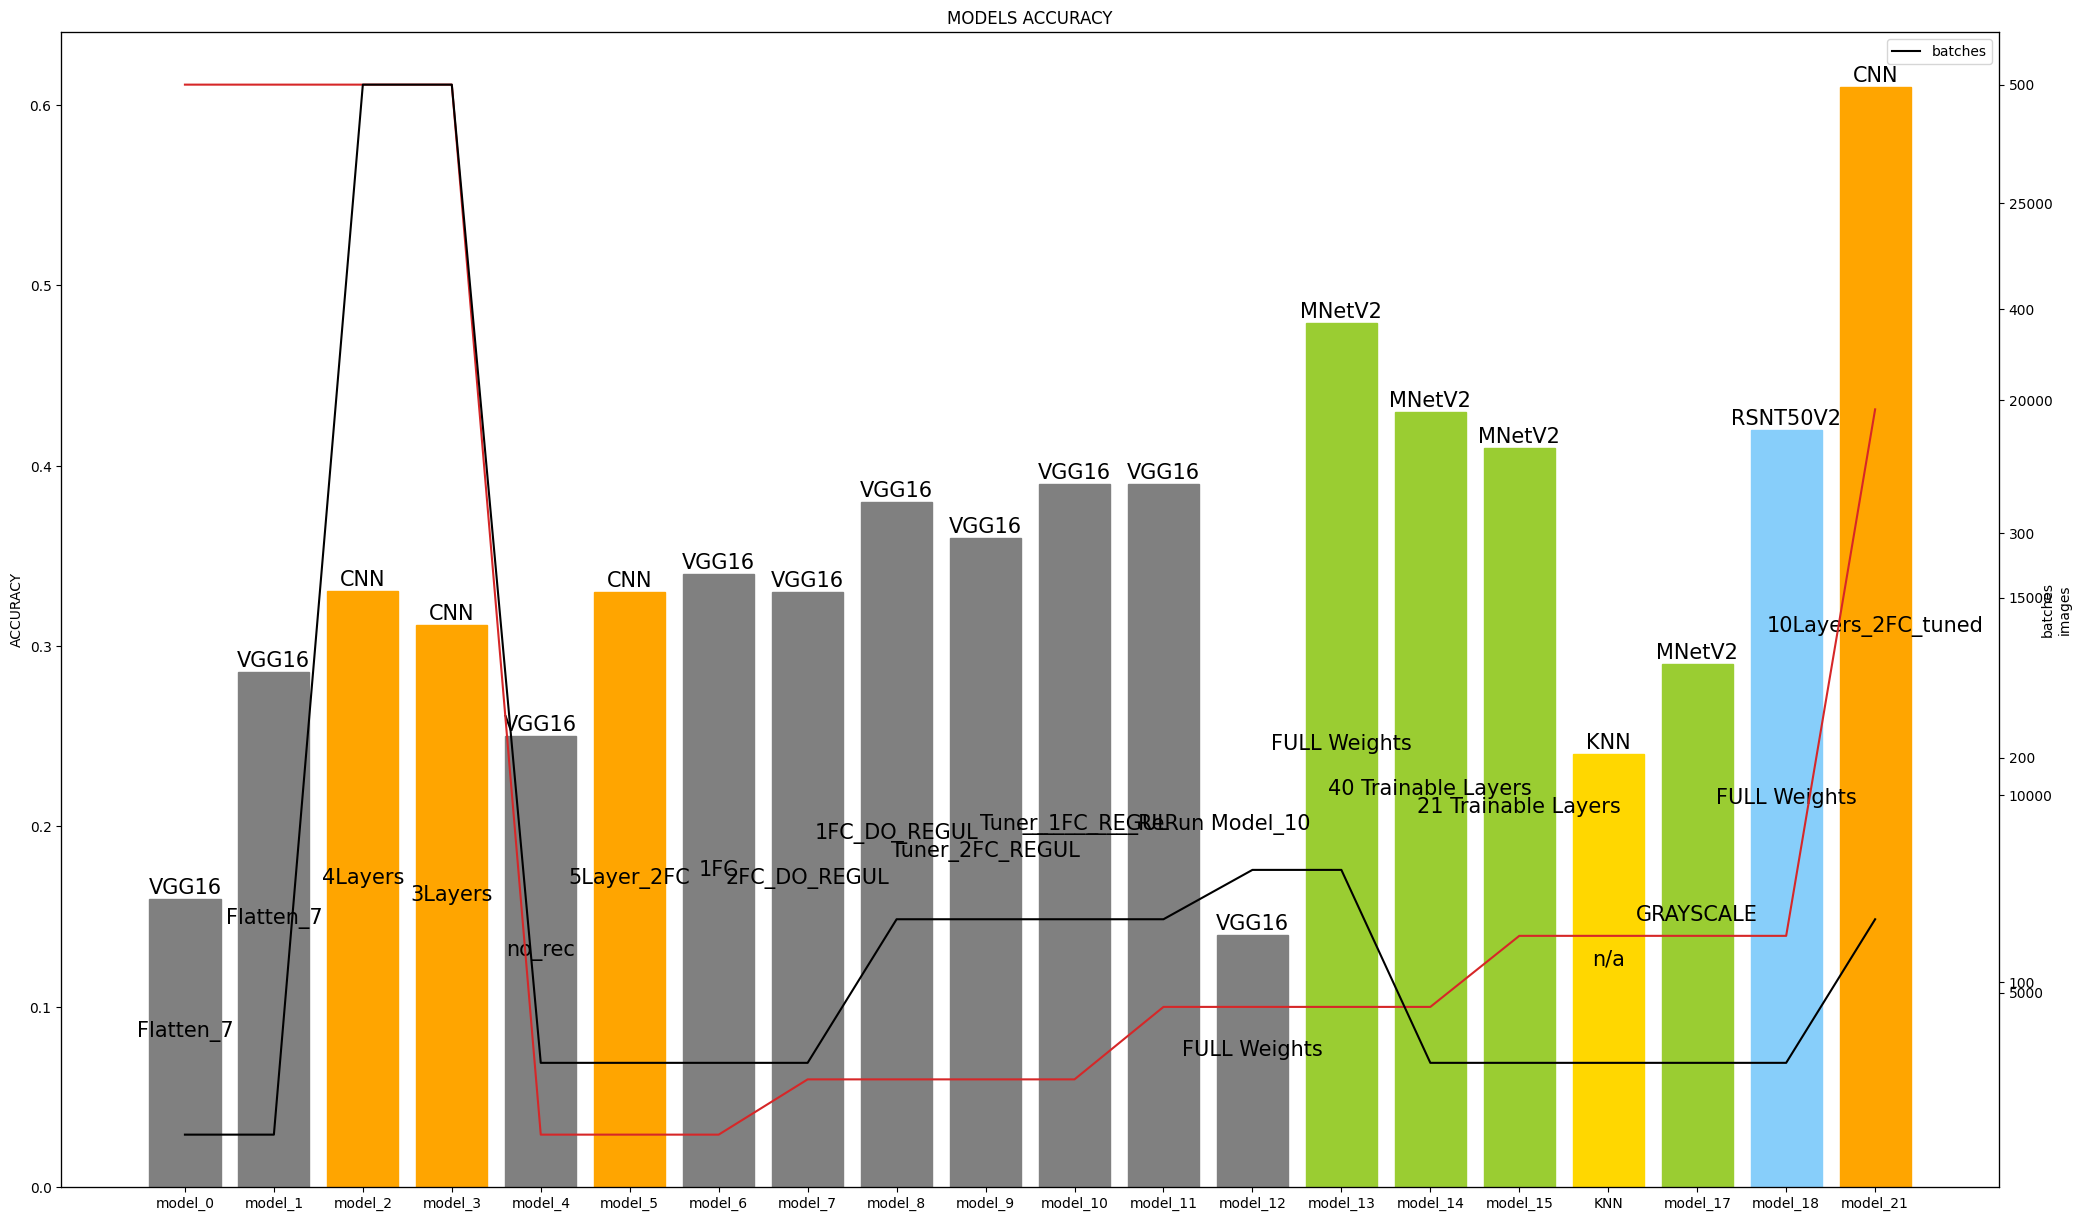

In [16]:
fig,ax = plt.subplots(figsize=(25,15)) 
ax1 = ax.twinx()
ax2 = ax.twinx()

types = df_recap['type']
models = df_recap['model']
accuracy = df_recap['accuracy']
images = df_recap['images']
batches = df_recap['batches']
specificity = df_recap['specificity']

#1st axis 
mdl =ax.bar(models, accuracy , align = 'center',color='gray', label='accuracy')

for bar in enumerate(ax.patches):
    ax.annotate(format([i for i in types][bar[0]]), #bar.get_height()
                   (bar[1].get_x() + bar[1].get_width() / 2,
                    bar[1].get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    ax.annotate(format([i for i in specificity][bar[0]]), #bar.get_height()
                   (bar[1].get_x() + bar[1].get_width() / 2,
                    bar[1].get_height()/2), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylabel('ACCURACY')
#Set bar colors
for bar, type in zip(ax.containers[0],types):
    # get x midpoint of bar
    #x = bar.get_x() + 0.5 * bar.get_width()
    # set bar color based on x
    if type == 'VGG16':
        bar.set_color('gray')
    if type == 'CNN':
        bar.set_color('orange')
    if type == 'MNetV2':
      bar.set_color('yellowgreen')
    if type == 'KNN':
      bar.set_color('gold')
    if type == 'RSNT50V2':
      bar.set_color('lightskyblue')


# 2nd axis
img = ax1.plot(models, images,  color='tab:red', label='Images')
#ax1.tick_params(axis='y' )
ax1.set_xlabel('models')
ax1.set_ylabel('images')

# 3rd axis
btch = ax2.plot(models, batches,  color='black', label='batches')
#ax1.tick_params(axis='y' )
ax2.set_xlabel('models')
ax2.set_ylabel('batches')


ax.set_title('MODELS ACCURACY')

plt.legend()
#plt.grid()
plt.show()


NOTE: if not specified activation is reLu

#### TRAINING SET >28000 Images, Batch_size=32
NOTE: Proof of records not consistent
* 0-Trial0 model: VGG16 No Top Layer + weights + epochs=1   :Imagenet ==> Accuracy: 0.16 (>3hours 3times trial)
* 1- trial1 : VGG16 No Top Layer + weights + epochs=3 + batch_size=500:imagenet + Flatten() + Dense(7,softmax) ==> Accuracy: 0.2855
* 2- Trial2 model2: CNN 4layers model_2 + epochs=3 + batch_size =500 + training sample//1000: Accuracy: 0.3305
* 3- Trial3 model3: CNN 3 layers model_3 + epochs=2 + batch_size=500 + training sample//1000: Accuracy:0.3120

#### TRAINING SET = 1400 Images (200 images/emotion), Batch_size=64
BOOTSTRAPPING
* 4- Trial4 model4: VGG16 + (lost cnn definition)  : Accuracy = 0.25
* 5- Trail5 model5: CNN 5 LAYERS + FC_1 (1024) + FC_2 (512) : Accuracy = 0.33
* 6- Trial6 model6: VGG16 + flat + FC_1 (1048) + FC_2 (1048)+ reduced lr :Accuracy =0.34

#### TRAINING SET = 2800 Images (400 images /emotion), 
- Batch_size=64
* 7 - Trial7 model7: VGG16 + flat + [ FC_1 (1048) + FC_2(1048)]* Dropout(0.2) + FC_3(1048) (regulizer l2) + reduced lr :Accuracy = 0.33
- Batch_size=128
* 8 - Trial8 model8: VGG16 + flat + [ FC_1 (1048)]* Dropout(0.2) + FC_2(1048) (regulizer l2) + reduced lr :Accuracy = 0.38

####Tuner
* 9 - Trial9 model9 (based on model7): VGG16 + flat + [ FC_1 (2528) + FC_2(160)]* Dropout(0.25) *Activation(tanh) + FC_3(2560) (regulizer l2) + reduced lr :Accuracy = 0.36
* 10 - Trial10 model10 (based on model8): VGG16 + flat + [ FC_1 (896)]* Dropout(0.2) + FC_3(1024) (regulizer l2) + reduced lr :Accuracy = 0.39 

#### TRAINING SET = 4636 Images ( 700 images /emotion. Only 436 Images Max on Digust)
* 11 - Trial11 model11 (based on model10): Accuracy = 0.39 

#### RETRAINING THE ENTIRE VGG16 weights:
* 12- Trial12 model 12: VGG16 + TOP_Layers : Accuracy= 0.14
- Batch_Size =150
#### RETRAINING THE ENTIRE MobileNetV2 weights:
* 13- Trial13 model 13: MobileNeV2t + Top Layers + lr(0.00001) : Accuracy=0.479 <<< BEST MODEL

#### PARTIAL TRAINING MobileNetV2:
* 14- Trial14 model 14 : MobileNetV2 (Bottom Imagenet until block 12)(114 layers) + Then 40 trainable layers +   lr(0.00001) : Accuracy= 0.43

#### TRAINING SET = 6436 Images ( 1000 images/ emtion. Only 436 Images Max on Disgust)
* 15- Trail15 model 15 : MobileNetV2 (Bottom Imagenet until block 14)(133 layers) + Then 21 trainable layers  +   lr(0.00001) : Accuracy= 0.41

#### KNN
* 16- Trial16 with KNN: Accuracy= 0.24

#### RETRAINING THE ENTIRE MobileNetV2 weights  ( same as model 13):
- -- GRAYSCALE --
* 17- Trial17 model 17: MobileNeV2t + Top Layers + lr(0.00001) : Accuracy=0.29

#### Custom CNN 
21-  10 Layers + 2 FC + tuned


Batch:128


Images: 19774





## VGG16: MODEL INSTANTIATION

16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers , five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer

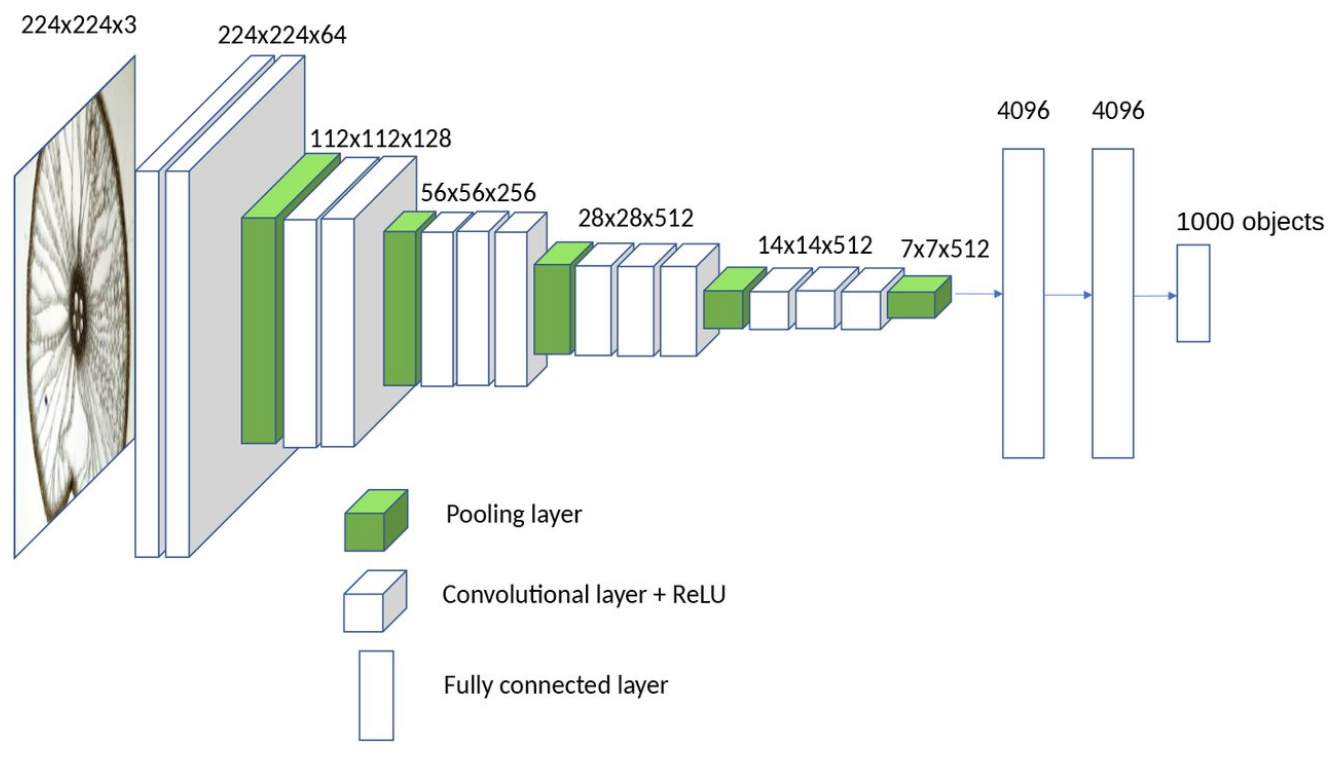

In [ ]:
# https://keras.io/api/applications/vgg/
# Pre-Processing layer before VGG

VGG = VGG16(include_top=False, weights='imagenet', input_shape=IMG_SIZE, classifier_activation='softmax') #classes=7, pooling='max'

for layer in VGG.layers:
    layer.trainable = False # No re-fitting of the weights



58889256/58889256 [==============================] - 3s 0us/step


# MODEL 0

In [ ]:
with tf.device(device_name):

  model_0 = Model(inputs=VGG.input, outputs=VGG.output) #only using VGG16 as is
  model_0.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_0.summary


In [ ]:

plot_loss_0 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_0 = ModelCheckpoint(filepath='model_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_0 = model_0.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_0, early_stop, plot_loss_0],
                      verbose=1)


In [ ]:
plot_loss_accuracy(history_0,model_0)

In [ ]:
testing.reset()
emotion_pred_indices = model.predict(testing)
predictions = np.argmax(emotion_pred_indices,axis=1)

print(classification_report(testing.classes, predictions, target_names = training.class_indices))


113/113 [==============================] - 20s 177ms/step
              precision    recall  f1-score   support

       angry       0.16      0.04      0.06       958
     disgust       0.02      0.09      0.03       111
        fear       0.16      0.35      0.22      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.18      0.60      0.28      1233
         sad       0.07      0.01      0.02      1247
    surprise       0.31      0.01      0.02       831

    accuracy                           0.16      7178
   macro avg       0.13      0.16      0.09      7178
weighted avg       0.12      0.16      0.09      7178



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MODEL 1 ( No records)

In [ ]:
with tf.device(device_name):
  top_model = VGG.output
  top_model = Flatten(name="flatten")(top_model)
  output_layer = Dense(num_classes, activation='softmax')(top_model)

  model = Model(inputs=VGG.input, outputs=output_layer) #only using VGG16 as is
  #print('VGG.input:',VGG.input)
  # tell the model what cost and optimization method to use
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )


In [ ]:

# with tf.device(device_name):
#   plot_loss_1 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

#   # ModelCheckpoint callback - save best weights
#   tl_checkpoint_1 = ModelCheckpoint(filepath='model_weights.h5',
#                                     monitor='val_accuracy',
#                                     save_best_only=True,
#                                     mode='max',
#                                     verbose=1)
 
    
    

#   # EarlyStopping
#   early_stop = EarlyStopping(monitor='val_loss',
#                             patience=10,
#                             restore_best_weights=True,
#                             mode='min')

#   history_1 = model.fit(training,
#                         batch_size=batch_size,
#                         epochs=epochs,
#                         validation_data=validation,
#                         steps_per_epoch=training.samples//200,
#                         validation_steps=validation.samples,
#                         callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
#                         verbose=1)

# """A problem with early stopping is that the model 
# does not make use of all available training data. 
# It may be desirable to avoid overfitting and to train on all possible data,
# especially on problems where the amount of training data is very limited."""



In [ ]:
classif_report(model_1, testing, training)

In [ ]:
plot_loss_accuracy(history_1,model_1)

# MODEL 2

In [ ]:
with tf.device(device_name): 

    model_2 = Sequential()

    # 1ST LAYERS  
    model_2.add(Conv2D(32, (5, 5), activation='relu', input_shape=IMG_SIZE, padding='same'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(BatchNormalization())
    model_2.add(Dropout(0.25))

    # 2ND LAYERS
    model_2.add(Conv2D(64, (3, 3), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(BatchNormalization())
    model_2.add(Dropout(0.25))

    # 3RD LAYERS
    model_2.add(Conv2D(128, (3, 3), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(BatchNormalization())
    model_2.add(Dropout(0.25))

    # 4th LAYERS
    model_2.add(Conv2D(256, (3, 3), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(BatchNormalization())
    model_2.add(Dropout(0.25))


    # Flatten the output of the convolutional layers to a 1D array
    model_2.add(Flatten())
    
    # Add a fully connected layer with 256 units and ReLU activation
    model_2.add(Dense(256, activation='relu'))
    
    model_2.add(Dense(num_classes, activation='softmax'))

# Compile
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_2.summary()

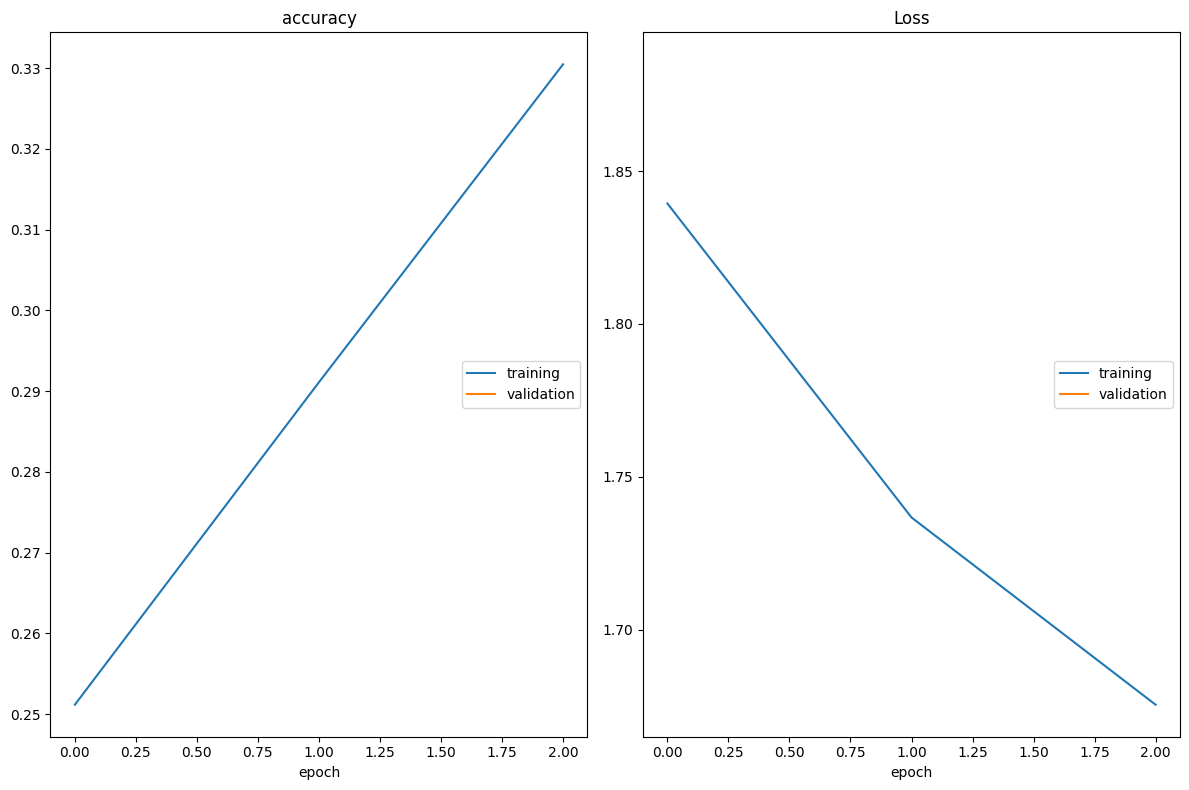

accuracy
	training         	 (min:    0.251, max:    0.330, cur:    0.330)
	validation       	 (min:    0.251, max:    0.251, cur:    0.251)
Loss
	training         	 (min:    1.675, max:    1.839, cur:    1.675)
	validation       	 (min:    1.885, max:    1.885, cur:    1.885)
22/22 [==============================] - 652s 30s/step - loss: 1.6754 - accuracy: 0.3305


In [ ]:

plot_loss_2 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_2 = ModelCheckpoint(filepath='model_2_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_2 = model_2.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples//1000,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_2, early_stop, plot_loss_2],
                      verbose=1)

# MODEL 3

In [ ]:
with tf.device(device_name): 

    model_3 = Sequential()

    # 1ST LAYERS  
    model_3.add(Conv2D(32, (5, 5), activation='relu', input_shape=IMG_SIZE, padding='same'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.25))

    # 2ND LAYERS
    model_3.add(Conv2D(64, (3, 3), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.25))

    # 3RD LAYERS
    model_3.add(Conv2D(128, (3, 3), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(BatchNormalization())
    model_3.add(Dropout(0.25))

    # Flatten the output of the convolutional layers to a 1D array
    model_3.add(Flatten())
    
    # Add a fully connected layer with 256 units and ReLU activation
    model_3.add(Dense(256, activation='relu'))
    
    model_3.add(Dense(num_classes, activation='softmax'))

# Compile
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_3.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

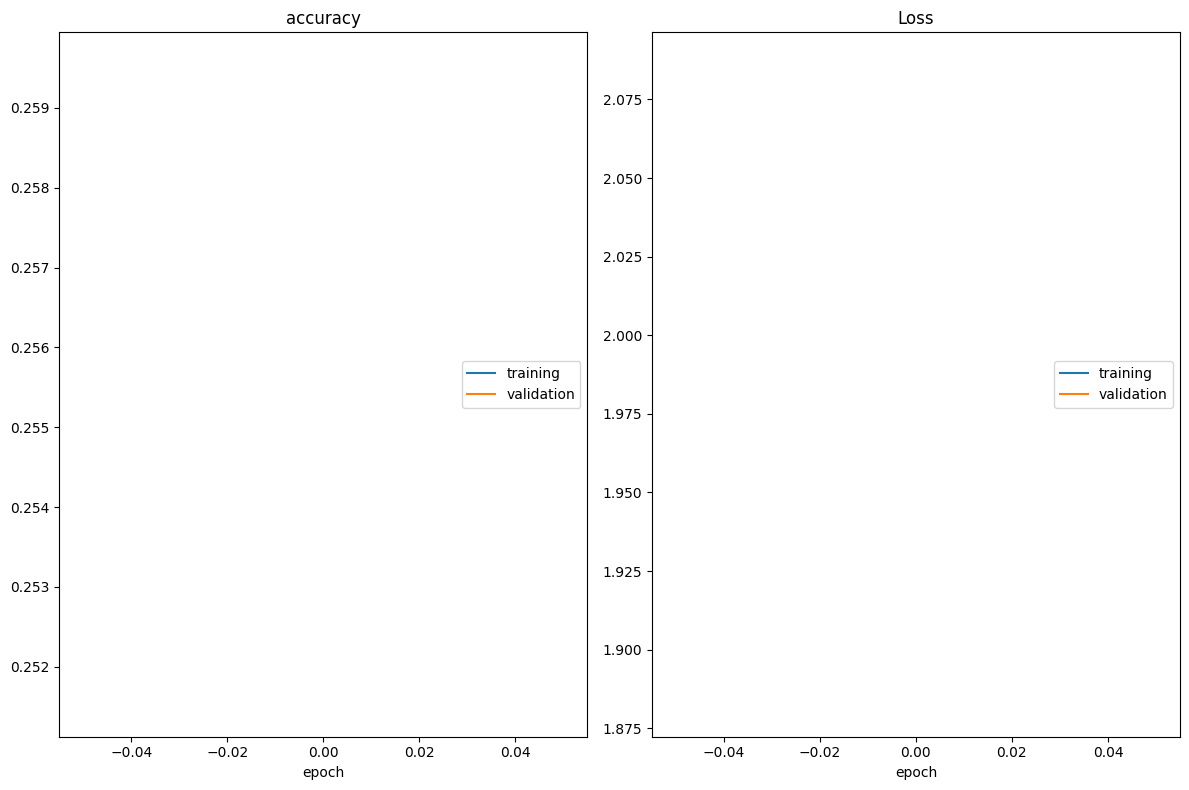

accuracy
	training         	 (min:    0.260, max:    0.260, cur:    0.260)
	validation       	 (min:    0.252, max:    0.252, cur:    0.252)
Loss
	training         	 (min:    2.086, max:    2.086, cur:    2.086)
	validation       	 (min:    1.883, max:    1.883, cur:    1.883)
22/22 [==============================] - 10778s 496s/step - loss: 2.0862 - accuracy: 0.2595 - val_loss: 1.8825 - val_accuracy: 0.2515
Epoch 2/2
 1/22 [>.............................] - ETA: 55:18 - loss: 1.8375 - accuracy: 0.3120

In [ ]:
plot_loss_3 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_3 = ModelCheckpoint(filepath=path_models+'model_3_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_3 = model_3.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples//1000,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_3, early_stop, plot_loss_3],
                      verbose=1)

In [ ]:
#Model: save/loading
model_3.save(path_models+'model_3')
#model_3 = tf.keras.models.load_model(path_models+'model_3')

#weights training history: save/load
np.save(os.path.join(path_models,'history_3.npy'),history_3.history)
#history_3=np.load(os.path.join(path_models,'history_3.npy'),allow_pickle='TRUE').item()


# MODEL 4
BOOTSTRAPPING VGG16 

In [ ]:

#BOOTSTRAPPING/ Why Skipping TopLayer/ why Flattening: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

# Bootstrappig with additionnal layers: 
#x = Flatten()(VGG.output)
#prediction = Dense(num_classes, activation='softmax')(x)
# A model grouping layers into an object with training/inference features
# https://keras.io/api/models/model/

def vgg_16_func():
  with tf.device(device_name):
    top_model = VGG.output
    top_model = Flatten(name="flatten")(top_model)
    #FC_1
    top_model = Dense(1048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    #FC_2
    #top_model = Dense(1048, activation='relu')(top_model)
    #top_model = Dropout(0.2)(top_model)
    
    top_model = Dense(1048, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(top_model)
    
    output_layer = Dense(num_classes, activation='softmax')(top_model)


    model = Model(inputs=VGG.input, outputs=output_layer) #only using VGG16 as is
    #print('VGG.input:',VGG.input)
    # tell the model what cost and optimization method to use
    model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
    )

    return model





## MODEL 4 
NOTE: No records of the exact CNN compilation definition

In [ ]:
# model structure 
model_4 = vgg_16_func()
model_4.summary()

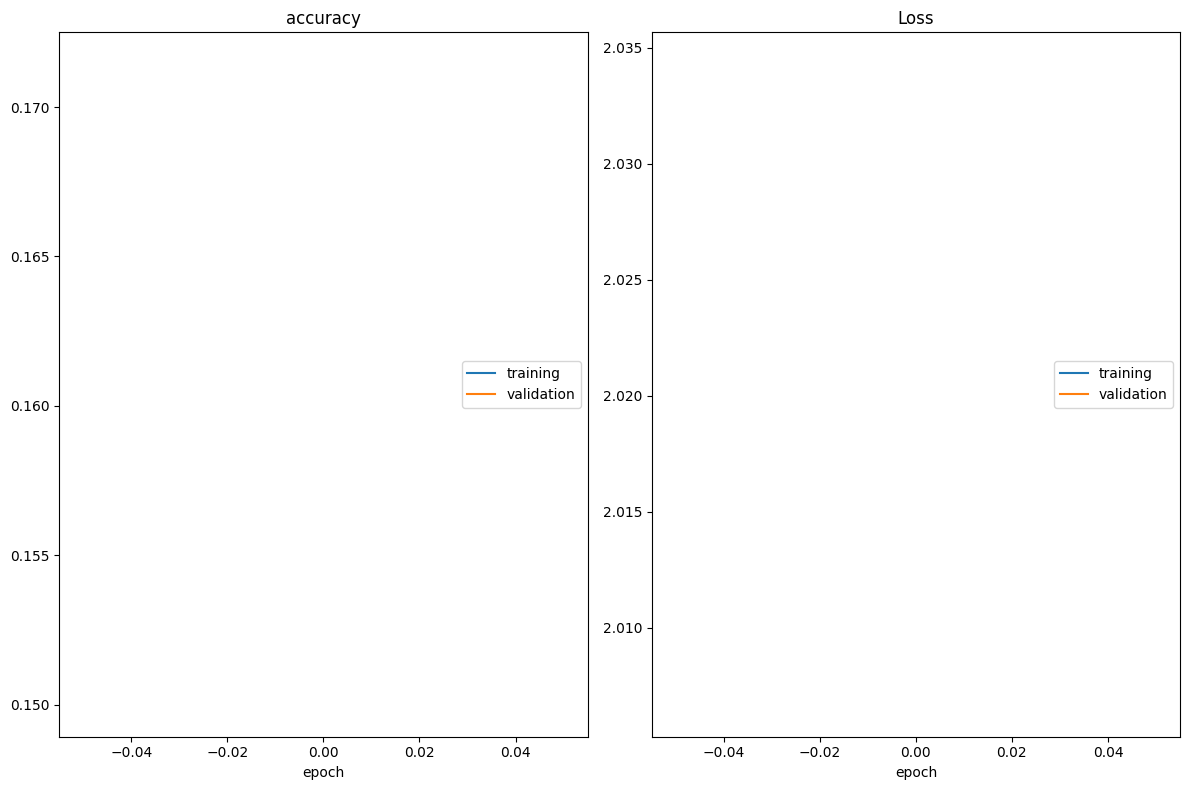

accuracy
	training         	 (min:    0.171, max:    0.171, cur:    0.171)
	validation       	 (min:    0.150, max:    0.150, cur:    0.150)
Loss
	training         	 (min:    2.034, max:    2.034, cur:    2.034)
	validation       	 (min:    2.007, max:    2.007, cur:    2.007)
1120/1120 [==============================] - 8s 6ms/step - loss: 2.0343 - accuracy: 0.1714 - val_loss: 2.0067 - val_accuracy: 0.1500


In [ ]:
with tf.device(device_name):
  plot_loss_4 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

  # ModelCheckpoint callback - save best weights
  tl_checkpoint_4 = ModelCheckpoint(filepath=path_models+'model_4_weights.h5',
                                    monitor='val_accuracy',
                                    save_best_only=True,
                                    mode='max',
                                    verbose=1)
 
    
    

  # EarlyStopping
  early_stop = EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True,
                            mode='min')

  history_4 = model_4.fit(training,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=validation,
                        steps_per_epoch=training.samples,
                        validation_steps=validation.samples,
                        callbacks=[tl_checkpoint_4, early_stop, plot_loss_4],
                        verbose=1)


In [ ]:
#Trained the model with top layers
with tf.device('/device:GPU:0'):
  history_4 = model_4.fit(training, 
                      epochs=epochs, 
                      #steps_per_epoch = training.samples,
                      validation_data=validation,
                      verbose=1)
                      #validation_steps=validation.samples)



Epoch 1/25
35/35 [==============================] - 4s 127ms/step - loss: 1.9169 - accuracy: 0.1875 - val_loss: 1.9379 - val_accuracy: 0.1714
Epoch 2/25
35/35 [==============================] - 4s 117ms/step - loss: 1.8741 - accuracy: 0.2330 - val_loss: 1.9277 - val_accuracy: 0.1679
Epoch 3/25
35/35 [==============================] - 4s 107ms/step - loss: 1.8493 - accuracy: 0.2304 - val_loss: 1.8818 - val_accuracy: 0.2357
Epoch 4/25
35/35 [==============================] - 4s 128ms/step - loss: 1.8337 - accuracy: 0.2482 - val_loss: 1.8727 - val_accuracy: 0.2214
Epoch 5/25
35/35 [==============================] - 4s 111ms/step - loss: 1.7935 - accuracy: 0.3036 - val_loss: 1.8586 - val_accuracy: 0.2321
Epoch 6/25
35/35 [==============================] - 4s 105ms/step - loss: 1.7837 - accuracy: 0.2893 - val_loss: 1.8606 - val_accuracy: 0.2714
Epoch 7/25
35/35 [==============================] - 4s 129ms/step - loss: 1.7620 - accuracy: 0.3107 - val_loss: 1.8548 - val_accuracy: 0.2571
Epoch 

In [ ]:
#Model: save/loading
model_4.save('path_models/model_4.h5')
#classifier_21 = tf.keras.models.load_model(path_models+'/model_1.h5')

#weights training history: save/load
np.save(os.path.join(path_models,'history_4.npy'),history_4.history)
#history_4=np.load(os.path.join(path_models,'history_4.npy'),allow_pickle='TRUE').item()









## MODEL_4 PLOTS

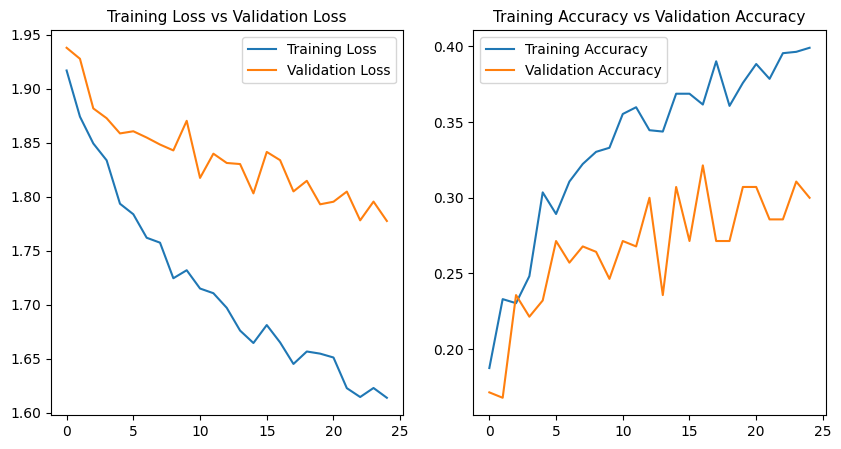

7/7 [==============================] - 1s 81ms/step - loss: 1.8065 - accuracy: 0.2571
Loss 1.8064924478530884
Accuracy 0.2571428716182709


In [ ]:
plot_loss_accuracy(history_4,model_4)


In [ ]:

classif_report(model_4, testing, training)

<ipython-input-35-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


7/7 [==============================] - 1s 113ms/step
              precision    recall  f1-score   support

       angry       0.14      0.17      0.15        30
     disgust       0.38      0.33      0.36        30
        fear       0.18      0.10      0.13        30
       happy       0.33      0.37      0.35        30
     neutral       0.17      0.17      0.17        30
         sad       0.24      0.23      0.24        30
    surprise       0.40      0.53      0.46        30

    accuracy                           0.27       210
   macro avg       0.26      0.27      0.26       210
weighted avg       0.26      0.27      0.26       210



# MODEL 5
CNN 5Layers + 2 FC

## CNN Layers

In [ ]:
def cnn():
  
  with tf.device(device_name): 

      model = Sequential()

      # hidden layer 1
      model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=IMG_SIZE, padding='same'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))

      # hidden layer 2
      model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))

      # hidden layer 3
      model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))

      # hidden layer 4
      model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(BatchNormalization())
      model.add(Dropout(0.25))


      # hidden layer 5
      model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
      model.add(MaxPooling2D(pool_size=(2, 2)))


      model.add(Flatten())

      # output layer
      model.add(Dense(1024, activation='relu'))
      model.add(Dense(512, activation='relu'))
      model.add(Dense(num_classes, activation='softmax'))

      


      # Compile
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

      # Prints the summary
      model.summary()

  return model

## MODEL 5 FIT

In [ ]:


model_5 = cnn()
model_5.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)      

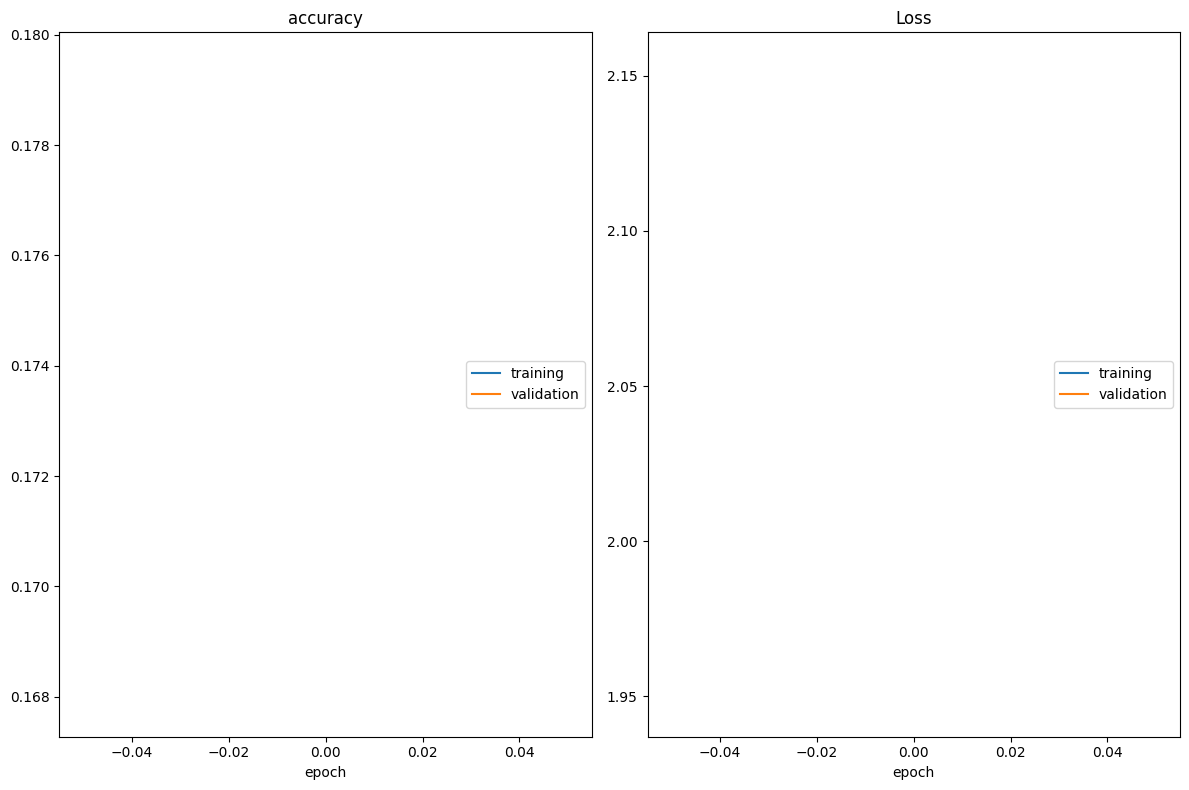

accuracy
	training         	 (min:    0.179, max:    0.179, cur:    0.179)
	validation       	 (min:    0.168, max:    0.168, cur:    0.168)
Loss
	training         	 (min:    2.154, max:    2.154, cur:    2.154)
	validation       	 (min:    1.947, max:    1.947, cur:    1.947)
1120/1120 [==============================] - 276s 236ms/step - loss: 2.1537 - accuracy: 0.1795 - val_loss: 1.9472 - val_accuracy: 0.1679


In [ ]:


plot_loss_5 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_5 = ModelCheckpoint(filepath=path_models+'model_5_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

  
  

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_5 = model_5.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_5, early_stop, plot_loss_5],
                      verbose=1)


In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
history_5 = model_5.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1)
                    #validation_steps=validation.samples)


Epoch 1/30
35/35 [==============================] - 4s 124ms/step - loss: 1.9404 - accuracy: 0.1830 - val_loss: 1.9579 - val_accuracy: 0.1429
Epoch 2/30
35/35 [==============================] - 3s 99ms/step - loss: 1.9289 - accuracy: 0.1937 - val_loss: 2.0257 - val_accuracy: 0.1357
Epoch 3/30
35/35 [==============================] - 3s 97ms/step - loss: 1.8994 - accuracy: 0.2080 - val_loss: 2.0244 - val_accuracy: 0.1536
Epoch 4/30
35/35 [==============================] - 3s 99ms/step - loss: 1.9027 - accuracy: 0.1955 - val_loss: 2.1343 - val_accuracy: 0.1321
Epoch 5/30
35/35 [==============================] - 4s 116ms/step - loss: 1.8793 - accuracy: 0.2295 - val_loss: 2.1620 - val_accuracy: 0.1429
Epoch 6/30
35/35 [==============================] - 3s 99ms/step - loss: 1.8572 - accuracy: 0.2536 - val_loss: 2.0030 - val_accuracy: 0.1714
Epoch 7/30
35/35 [==============================] - 3s 100ms/step - loss: 1.8353 - accuracy: 0.2670 - val_loss: 2.0084 - val_accuracy: 0.1429
Epoch 8/30

## MODEL_5 PLOT

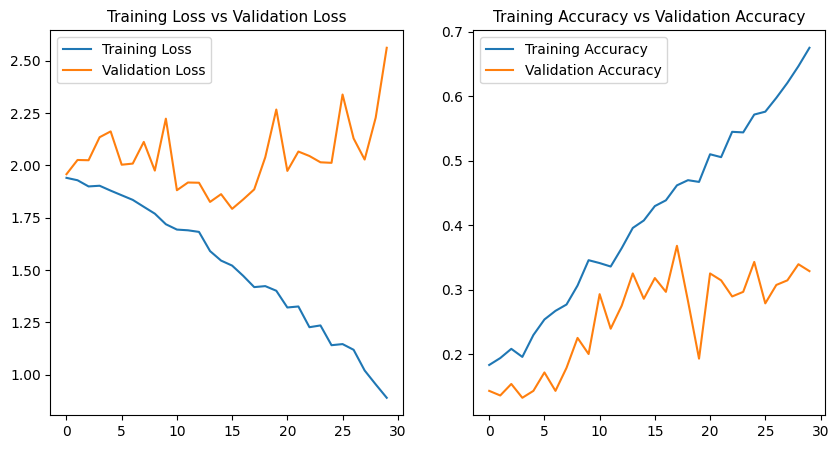

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


7/7 [==============================] - 36s 6s/step - loss: 2.4195 - accuracy: 0.3333
Loss 2.419520139694214
Accuracy 0.3333333432674408


<ipython-input-11-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


7/7 [==============================] - 1s 71ms/step
              precision    recall  f1-score   support

       angry       0.29      0.23      0.26        30
     disgust       0.37      0.37      0.37        30
        fear       0.24      0.40      0.30        30
       happy       0.47      0.27      0.34        30
     neutral       0.23      0.40      0.29        30
         sad       0.08      0.03      0.05        30
    surprise       0.67      0.53      0.59        30

    accuracy                           0.32       210
   macro avg       0.33      0.32      0.31       210
weighted avg       0.33      0.32      0.31       210



In [ ]:
plot_loss_accuracy(history_5,model_5)


In [ ]:
classif_report(model_5, testing, training)

1/7 [===>..........................] - ETA: 0s

<ipython-input-11-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


7/7 [==============================] - 1s 71ms/step
              precision    recall  f1-score   support

       angry       0.29      0.20      0.24        30
     disgust       0.48      0.50      0.49        30
        fear       0.25      0.37      0.30        30
       happy       0.47      0.27      0.34        30
     neutral       0.18      0.30      0.23        30
         sad       0.25      0.13      0.17        30
    surprise       0.56      0.60      0.58        30

    accuracy                           0.34       210
   macro avg       0.36      0.34      0.34       210
weighted avg       0.36      0.34      0.34       210




# MODEL 6 
BOOTSTRAPPING VGG16

## Model 6 LAYERS

In [ ]:
model_6 = vgg_16_func()
model_6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

## MODEL 6 FIT

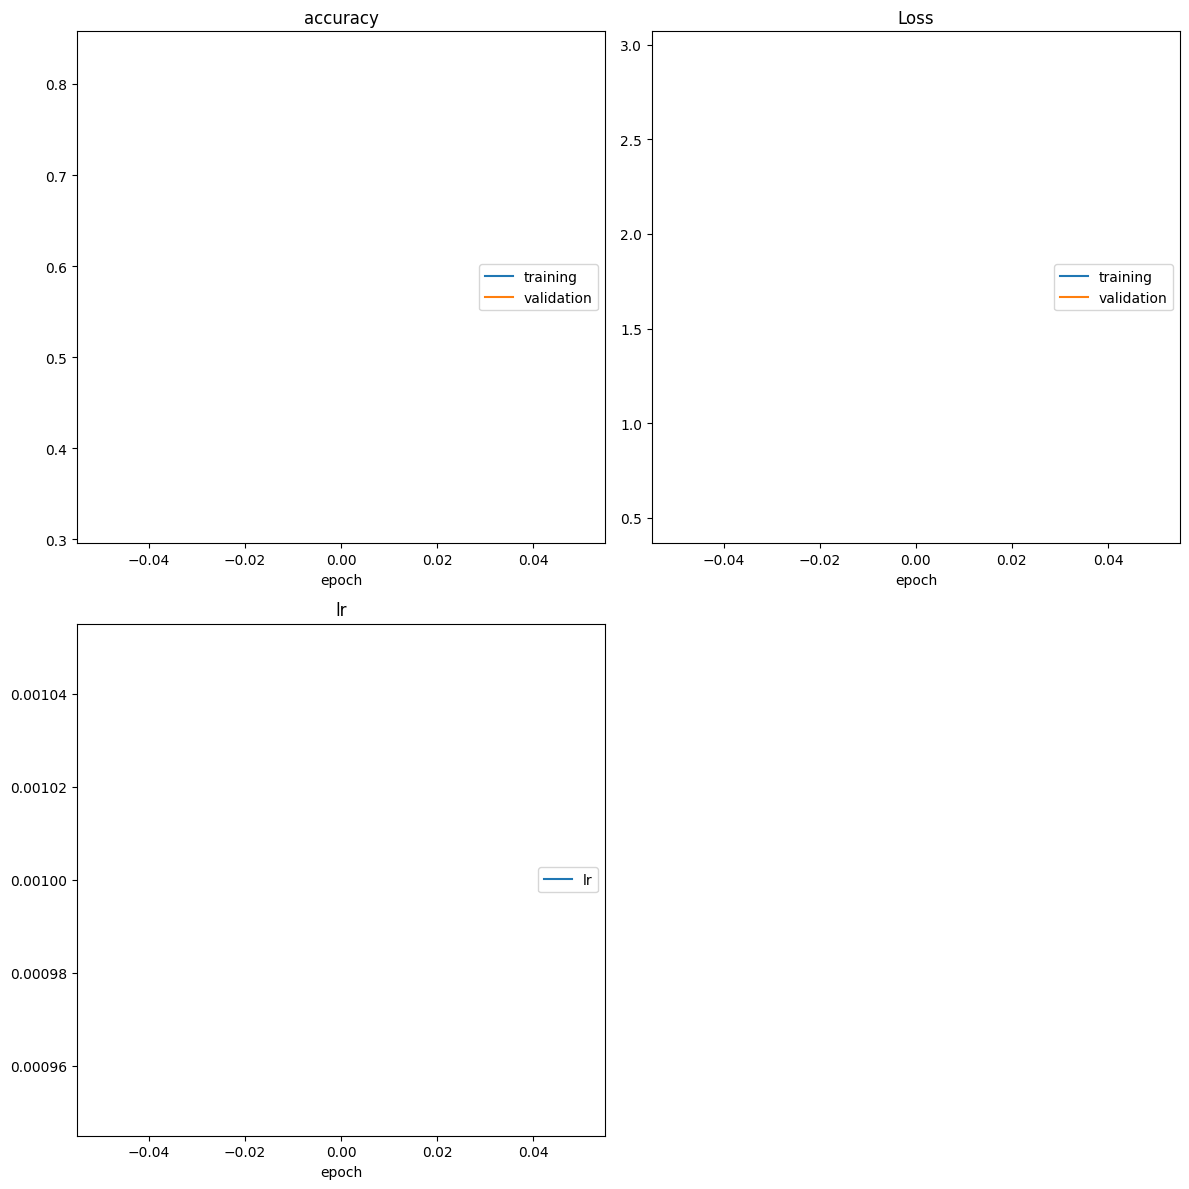

accuracy
	training         	 (min:    0.832, max:    0.832, cur:    0.832)
	validation       	 (min:    0.321, max:    0.321, cur:    0.321)
Loss
	training         	 (min:    0.489, max:    0.489, cur:    0.489)
	validation       	 (min:    2.947, max:    2.947, cur:    2.947)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
2240/2240 [==============================] - 9s 4ms/step - loss: 0.4891 - accuracy: 0.8321 - val_loss: 2.9472 - val_accuracy: 0.3214 - lr: 0.0010


In [ ]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


plot_loss_6 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_6 = ModelCheckpoint(filepath=path_models+'model_6_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

  
  

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_6 = model_6.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_6, early_stop, reduce_lr,plot_loss_6],
                      verbose=1)

In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
history_6 = model_6.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)


Epoch 1/20
35/35 [==============================] - 7s 188ms/step - loss: 0.4994 - accuracy: 0.8232 - val_loss: 3.0152 - val_accuracy: 0.3357 - lr: 0.0010
Epoch 2/20
35/35 [==============================] - 6s 182ms/step - loss: 0.4397 - accuracy: 0.8424 - val_loss: 3.0490 - val_accuracy: 0.3393 - lr: 0.0010
Epoch 3/20
35/35 [==============================] - 7s 199ms/step - loss: 0.4382 - accuracy: 0.8420 - val_loss: 3.1941 - val_accuracy: 0.3089 - lr: 0.0010
Epoch 4/20
35/35 [==============================] - 6s 184ms/step - loss: 0.4195 - accuracy: 0.8491 - val_loss: 3.0561 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 5/20
35/35 [==============================] - 7s 201ms/step - loss: 0.4369 - accuracy: 0.8491 - val_loss: 3.2121 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 6/20
35/35 [==============================] - 6s 181ms/step - loss: 0.4276 - accuracy: 0.8554 - val_loss: 3.2805 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 7/20
35/35 [==============================] - 7s 201ms/step - lo

In [ ]:
#Model: save/loading
pickle.dump(model_6, open(path_models+'model_6_pckl.pkl', 'wb'))
model_6.save(path_models+'model_6')
#model_6 = tf.keras.models.load_model(path_models+'model_6')

#weights training history: save/load
np.save(os.path.join(path_models,'history_6.npy'),history_6.history)
#history_6=np.load(os.path.join(path_models,'history_6.npy'),allow_pickle='TRUE').item()


## MODEL 6 PLOTS

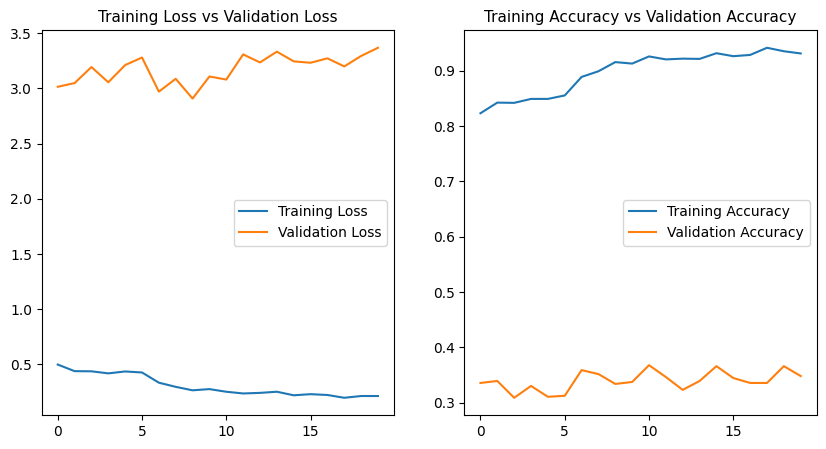

4/4 [==============================] - 0s 104ms/step - loss: 3.1788 - accuracy: 0.3476
Loss 3.1787829399108887
Accuracy 0.34761905670166016


In [ ]:
plot_loss_accuracy(history_6,model_6)

In [ ]:
classif_report(model_6, testing, training)

<ipython-input-61-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 1s 139ms/step
              precision    recall  f1-score   support

       angry       0.23      0.20      0.21        30
     disgust       0.48      0.40      0.44        30
        fear       0.28      0.30      0.29        30
       happy       0.48      0.43      0.46        30
     neutral       0.31      0.37      0.34        30
         sad       0.21      0.20      0.20        30
    surprise       0.47      0.57      0.52        30

    accuracy                           0.35       210
   macro avg       0.35      0.35      0.35       210
weighted avg       0.35      0.35      0.35       210



# MODEL 7 
BOOTSTRAPPING VGG16 
+ 2FC + Dropoutlayers(0.2) 
+ regularizer=l2(0.01))
+Training dataset: 400 / category

## MODEL 7 LAYERS

In [ ]:
model_7 = vgg_16_func()
model_7.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

## MODEL 7 FIT

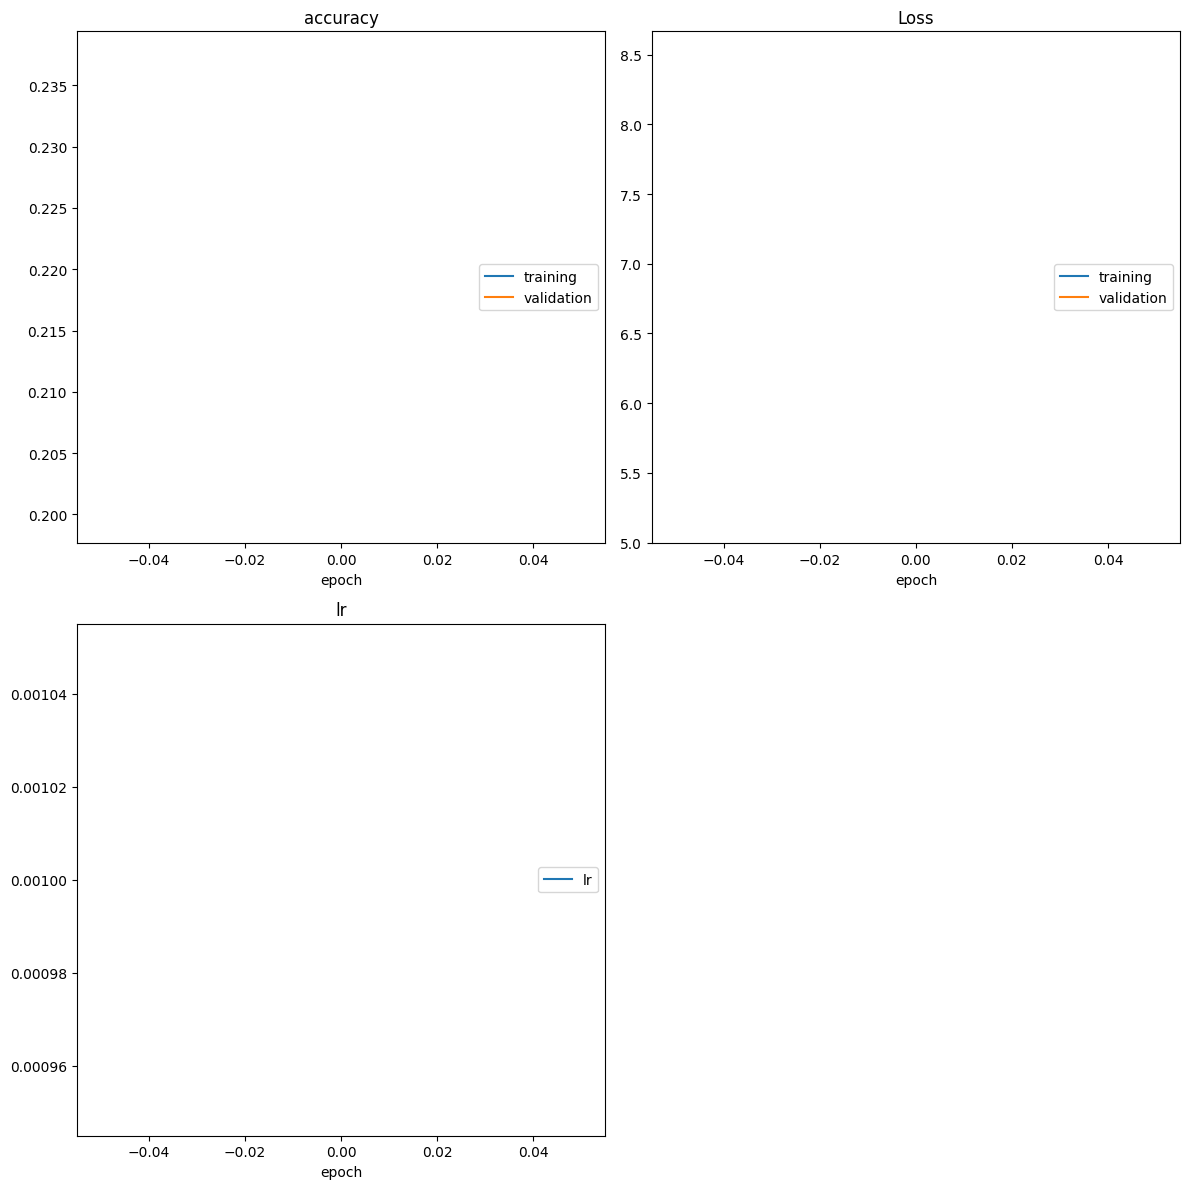

accuracy
	training         	 (min:    0.200, max:    0.200, cur:    0.200)
	validation       	 (min:    0.237, max:    0.237, cur:    0.237)
Loss
	training         	 (min:    8.501, max:    8.501, cur:    8.501)
	validation       	 (min:    5.162, max:    5.162, cur:    5.162)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
2240/2240 [==============================] - 10s 3ms/step - loss: 8.5007 - accuracy: 0.1996 - val_loss: 5.1623 - val_accuracy: 0.2375 - lr: 0.0010


In [ ]:

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


plot_loss_7 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch

# ModelCheckpoint callback - save best weights
tl_checkpoint_7 = ModelCheckpoint(filepath=path_models+'model_7_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

  
  

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_7 = model_7.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_7, early_stop, reduce_lr,plot_loss_7],
                      verbose=1)


In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
history_7 = model_7.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)


Epoch 1/50
35/35 [==============================] - 6s 178ms/step - loss: 3.8072 - accuracy: 0.2884 - val_loss: 2.8814 - val_accuracy: 0.2786 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 10s 290ms/step - loss: 2.5013 - accuracy: 0.2893 - val_loss: 2.2579 - val_accuracy: 0.2643 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 6s 170ms/step - loss: 2.0563 - accuracy: 0.3138 - val_loss: 1.9735 - val_accuracy: 0.3143 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 7s 209ms/step - loss: 1.8789 - accuracy: 0.3366 - val_loss: 1.9315 - val_accuracy: 0.3268 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 7s 199ms/step - loss: 1.8045 - accuracy: 0.3384 - val_loss: 1.8731 - val_accuracy: 0.2804 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 7s 192ms/step - loss: 1.7451 - accuracy: 0.3562 - val_loss: 1.8503 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - 6s 168ms/step - l

In [ ]:
#Model: save/loading
pickle.dump(model_7, open(path_models+'model_7_pckl.pkl', 'wb'))
model_7.save(path_models+'model_7')
#model_7 = tf.keras.models.load_model(path_models+'model_7')

#weights training history: save/load
np.save(os.path.join(path_models,'history_7.npy'),history_7.history)
#history_7=np.load(os.path.join(path_models,'history_7.npy'),allow_pickle='TRUE').item()

## MODEL 7 PLOT

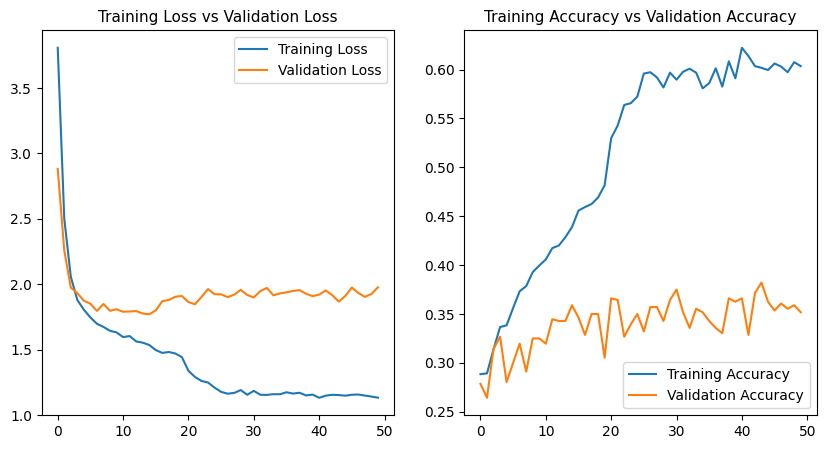

4/4 [==============================] - 1s 108ms/step - loss: 2.0154 - accuracy: 0.3333
Loss 2.0154387950897217
Accuracy 0.3333333432674408


In [ ]:
plot_loss_accuracy(history_7,model_7)

In [ ]:
classif_report(model_7, testing, training)

<ipython-input-61-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 2s 249ms/step
              precision    recall  f1-score   support

       angry       0.16      0.13      0.15        30
     disgust       0.58      0.50      0.54        30
        fear       0.33      0.30      0.32        30
       happy       0.39      0.40      0.39        30
     neutral       0.33      0.37      0.35        30
         sad       0.31      0.37      0.33        30
    surprise       0.53      0.57      0.55        30

    accuracy                           0.38       210
   macro avg       0.38      0.38      0.37       210
weighted avg       0.38      0.38      0.37       210



# MODEL 8 
BOOTSTRAPPING VGG16
+ 1 FC + Dropoutlayers(0.2) 
+ regularizer=l2(0.01))
+ min_lr=0.000001)
Batch_size=128
epochs=80

---



## MODEL 8 LAYERS

In [ ]:
model_8 = vgg_16_func()
model_8.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

## MODEL 8 FIT

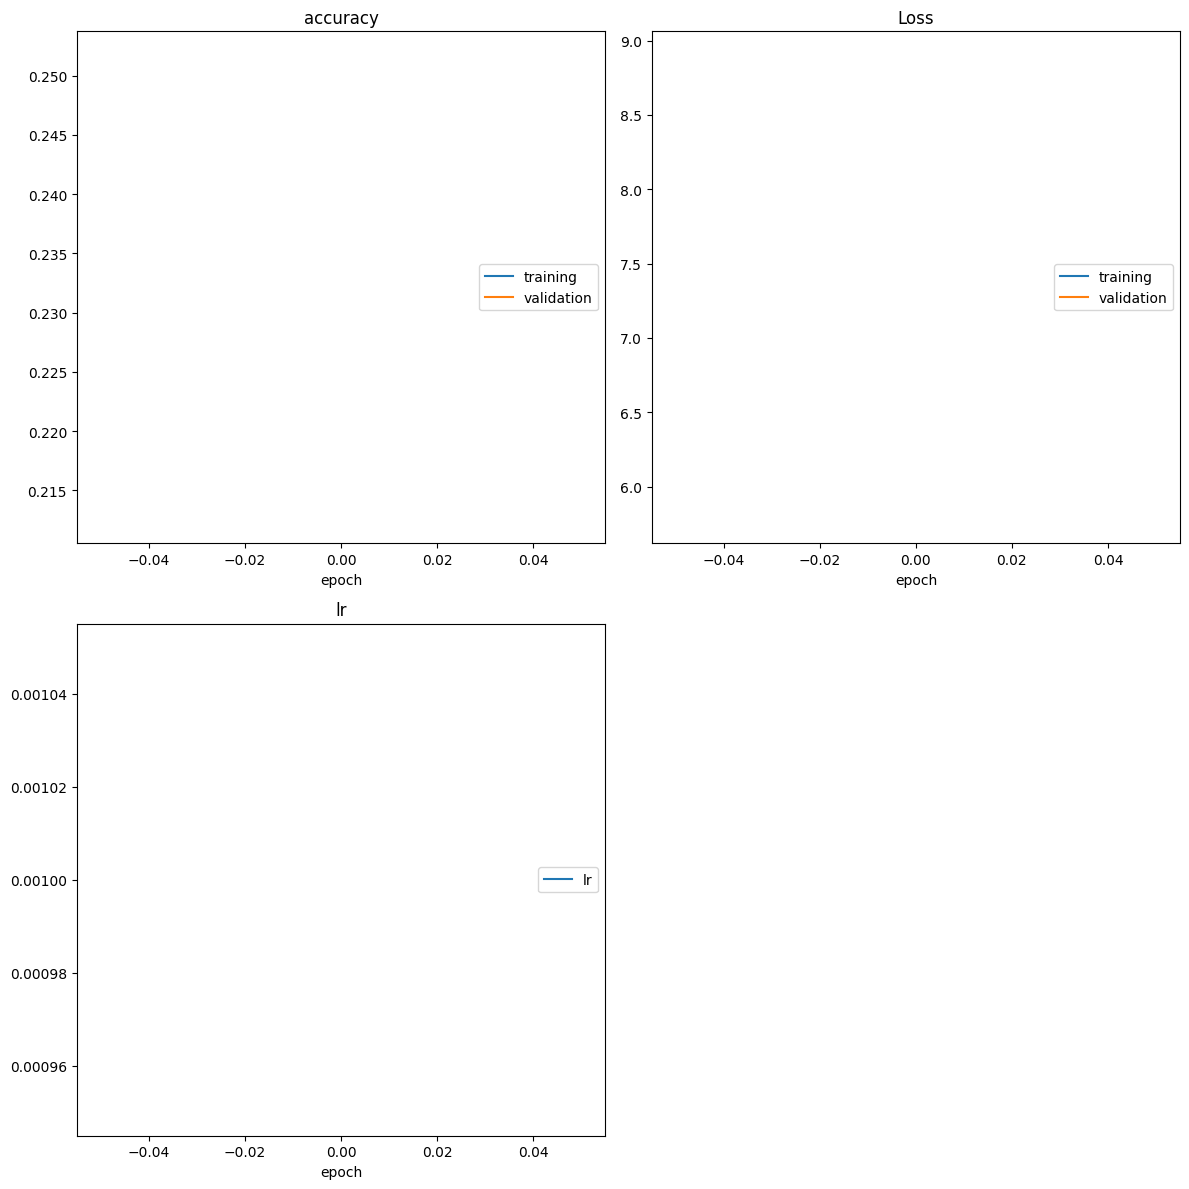

accuracy
	training         	 (min:    0.213, max:    0.213, cur:    0.213)
	validation       	 (min:    0.252, max:    0.252, cur:    0.252)
Loss
	training         	 (min:    8.906, max:    8.906, cur:    8.906)
	validation       	 (min:    5.776, max:    5.776, cur:    5.776)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
2240/2240 [==============================] - 535s 228ms/step - loss: 8.9061 - accuracy: 0.2125 - val_loss: 5.7759 - val_accuracy: 0.2518 - lr: 0.0010


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
plot_loss_8 = PlotLossesCallback() # Allows live(in training) monitoring of the loss and accuracy at each epoch
# ModelCheckpoint callback - save best weights
tl_checkpoint_8 = ModelCheckpoint(filepath=path_models+'model_8_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')
history_8 = model_8.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_8, early_stop, reduce_lr,plot_loss_8],
                      verbose=1)


In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
history_8 = model_8.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)


Epoch 1/80
35/35 [==============================] - 7s 206ms/step - loss: 4.5688 - accuracy: 0.2879 - val_loss: 3.7399 - val_accuracy: 0.2786 - lr: 0.0010
Epoch 2/80
35/35 [==============================] - 7s 186ms/step - loss: 3.2301 - accuracy: 0.3094 - val_loss: 2.9044 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/80
35/35 [==============================] - 7s 206ms/step - loss: 2.5850 - accuracy: 0.3313 - val_loss: 2.4326 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/80
35/35 [==============================] - 7s 195ms/step - loss: 2.2220 - accuracy: 0.3491 - val_loss: 2.1598 - val_accuracy: 0.3161 - lr: 0.0010
Epoch 5/80
35/35 [==============================] - 7s 211ms/step - loss: 2.0124 - accuracy: 0.3616 - val_loss: 2.0379 - val_accuracy: 0.2929 - lr: 0.0010
Epoch 6/80
35/35 [==============================] - 7s 193ms/step - loss: 1.8745 - accuracy: 0.3634 - val_loss: 1.9716 - val_accuracy: 0.3268 - lr: 0.0010
Epoch 7/80
35/35 [==============================] - 7s 208ms/step - lo

In [ ]:
#Model: save/loading
pickle.dump(model_8, open(path_models+'model_8_pckl.pkl', 'wb'))
#model_8.save(path_models+'model_8')
#model_8 = tf.keras.models.load_model(path_models+'model_8')

#weights training history: save/load
#np.save(os.path.join(path_models,'history_8.npy'),history_8.history)
#history_8=np.load(os.path.join(path_models,'history_8.npy'),allow_pickle='TRUE').item()

## MODEL 8 PLOTS

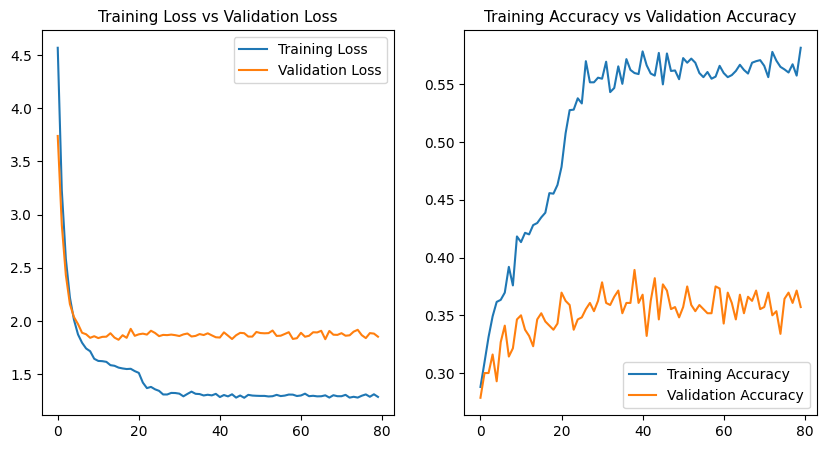

4/4 [==============================] - 30s 10s/step - loss: 1.8781 - accuracy: 0.3857
Loss 1.8781254291534424
Accuracy 0.3857142925262451


In [ ]:
plot_loss_accuracy(history_8,model_8)

In [ ]:
classif_report(model_8, testing, training)

<ipython-input-18-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 1s 117ms/step
              precision    recall  f1-score   support

       angry       0.14      0.10      0.12        30
     disgust       0.57      0.43      0.49        30
        fear       0.35      0.30      0.32        30
       happy       0.36      0.43      0.39        30
     neutral       0.37      0.43      0.40        30
         sad       0.31      0.37      0.34        30
    surprise       0.53      0.60      0.56        30

    accuracy                           0.38       210
   macro avg       0.38      0.38      0.37       210
weighted avg       0.38      0.38      0.37       210



# Model 9: 
keras_tuner on the model 7

## MODEL 9 TUNNING

In [ ]:
def model_instrumentation(num_classes, units, activation, dropout, lr=None ):
  with tf.device(device_name):
    top_model = VGG.output
    top_model = Flatten(name="flatten")(top_model)
    #FC_1
    top_model = Dense(units[0], activation=activation)(top_model)
    #top_model = Dropout(0.2)(top_model)
    if dropout:
        top_model = Dropout(0.25)(top_model)
    #FC_2
    top_model = Dense(units[1], activation=activation)(top_model)
    #top_model = Dropout(0.2)(top_model)
    if dropout:
        top_model = Dropout(0.25)(top_model)

    top_model = Dense(units[2], kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(top_model)

    output_layer = Dense(num_classes, activation='softmax')(top_model)


    model = Model(inputs=VGG.input, outputs=output_layer) #only using VGG16 as is
    #print('VGG.input:',VGG.input)
    # tell the model what cost and optimization method to use
    model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
    )

    return model


In [ ]:
def build_model(hp):
    
    FC_1 = hp.Int("FC_1", min_value=32, max_value=4096, step=32)
    FC_2 = hp.Int("FC_2", min_value=32, max_value=4096, step=32)
    REGUL = hp.Int("REGUL", min_value=32, max_value=4096, step=32)
    
    units = [FC_1,FC_2, REGUL]
    
    activation=hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    #lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    
    

    model = model_instrumentation(num_classes, units=units, activation=activation, dropout=dropout, lr=None)

    model.summary()

    return model

In [ ]:
# Searching for the best model parameters
build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=2,             
    executions_per_trial=2,
    overwrite=False,
    directory=path_models+"tuner",
    project_name="results_9",
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
# SEARCH PARAMETERS RECAP
tuner.search_space_summary()

Search space summary
Default search space size: 5
FC_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 4096, 'step': 32, 'sampling': 'linear'}
FC_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 4096, 'step': 32, 'sampling': 'linear'}
REGUL (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 4096, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}


In [ ]:
tuner.search(training, epochs=epochs, validation_data=validation)



Trial 2 Complete [00h 20m 36s]
val_accuracy: 0.3642857074737549

Best val_accuracy So Far: 0.3642857074737549
Total elapsed time: 00h 42m 55s


In [ ]:
best_params_9 = tuner.get_best_hyperparameters()[0]
best_model_9 = tuner.get_best_models()[0]
for p,v in best_params_9.values.items():
  print(p,' : ', v, '\n')



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
best_model_9.save(path_models+'model_9')

In [ ]:
#EITHER 
#model_9 = best_model_9
#OR LOAD
model_9 = tf.keras.models.load_model(path_models+'tuner/model_9')

## MODEL 9 FIT

In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
history_9 = best_model_9.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)


Epoch 1/80
35/35 [==============================] - 10s 232ms/step - loss: 1.3901 - accuracy: 0.5009 - val_loss: 1.8904 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 2/80
35/35 [==============================] - 7s 191ms/step - loss: 1.4466 - accuracy: 0.4714 - val_loss: 1.8367 - val_accuracy: 0.3589 - lr: 0.0010
Epoch 3/80
35/35 [==============================] - 7s 210ms/step - loss: 1.3836 - accuracy: 0.5009 - val_loss: 1.8461 - val_accuracy: 0.3429 - lr: 0.0010
Epoch 4/80
35/35 [==============================] - 7s 196ms/step - loss: 1.4374 - accuracy: 0.4844 - val_loss: 1.9345 - val_accuracy: 0.3268 - lr: 0.0010
Epoch 5/80
35/35 [==============================] - 7s 207ms/step - loss: 1.4197 - accuracy: 0.4964 - val_loss: 1.8953 - val_accuracy: 0.3286 - lr: 0.0010
Epoch 6/80
35/35 [==============================] - 7s 204ms/step - loss: 1.4024 - accuracy: 0.5031 - val_loss: 1.9009 - val_accuracy: 0.3250 - lr: 0.0010
Epoch 7/80
35/35 [==============================] - 7s 188ms/step - l

In [ ]:
#Model: save/loading
pickle.dump(best_model_9, open(path_models+'model_9_pckl.pkl', 'wb'))
#model_9.save(path_models+'model_9')
#model_9 = tf.keras.models.load_model(path_models+'model_9')

#weights training history: save/load
np.save(os.path.join(path_models,'history_9.npy'),history_9.history)
#history_9=np.load(os.path.join(path_models,'history_9.npy'),allow_pickle='TRUE').item()

## MODEL 9 PLOTS

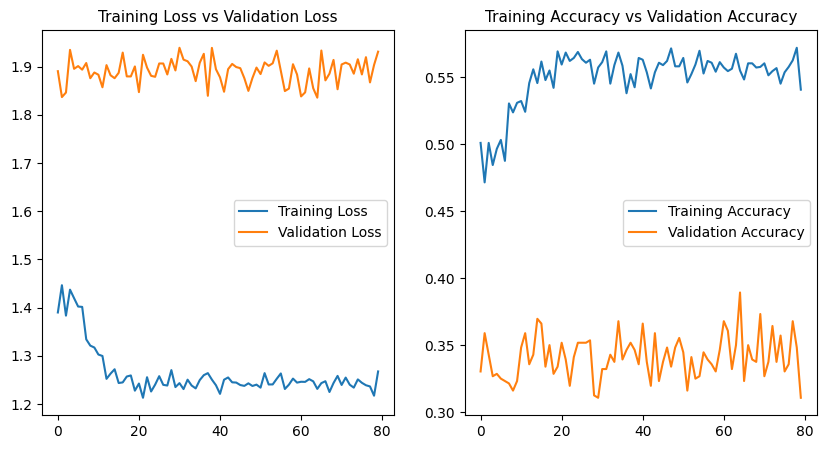

4/4 [==============================] - 1s 108ms/step - loss: 1.8283 - accuracy: 0.3619
Loss 1.828338623046875
Accuracy 0.3619047701358795


In [ ]:
plot_loss_accuracy(history_9,best_model_9)

In [ ]:
classif_report(model_8, testing, training)

<ipython-input-18-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 1s 113ms/step
              precision    recall  f1-score   support

       angry       0.30      0.27      0.28        30
     disgust       0.52      0.47      0.49        30
        fear       0.28      0.27      0.27        30
       happy       0.37      0.50      0.42        30
     neutral       0.36      0.40      0.38        30
         sad       0.25      0.20      0.22        30
    surprise       0.55      0.53      0.54        30

    accuracy                           0.38       210
   macro avg       0.37      0.38      0.37       210
weighted avg       0.37      0.38      0.37       210



# Model 10: Tuning the previous model 8

## MODEL 10 TUNNING

In [ ]:
def model_instrumentation_2(num_classes, units, activation, dropout, lr=None ):
  with tf.device(device_name):
      top_model = VGG.output
      top_model = Flatten(name="flatten")(top_model)
      #FC_1
      top_model = Dense(units[0], activation=activation)(top_model)
      if dropout:
        top_model = Dropout(0.20)(top_model)
      
      
      top_model = Dense(units[1], kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(top_model)
      
      output_layer = Dense(num_classes, activation='softmax')(top_model)


      model = Model(inputs=VGG.input, outputs=output_layer) #only using VGG16 as is
      #print('VGG.input:',VGG.input)
      # tell the model what cost and optimization method to use
      model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
      )
      return model


In [ ]:
def build_model_2(hp):
    
    FC_1 = hp.Int("FC_1", min_value=32, max_value=4096, step=32)
    
    REGUL = hp.Int("REGUL", min_value=32, max_value=4096, step=32)
    
    units = [FC_1, REGUL]
    
    activation=hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    #lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    
    

    model = model_instrumentation_2(num_classes, units=units, activation=activation, dropout=dropout, lr=None)

    model.summary()

    

    return model

In [ ]:
# Searching for the best model parameters
build_model_2(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model_2,
    objective="val_accuracy",
    max_trials=2,             
    executions_per_trial=2,
    overwrite=False,
    directory=path_models+"tuner",
    project_name="results_10",
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
# SEARCH PARAMETERS RECAP
tuner.search_space_summary()

Search space summary
Default search space size: 4
FC_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 4096, 'step': 32, 'sampling': 'linear'}
REGUL (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 4096, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}


In [ ]:
tuner.search(training, epochs=epochs, validation_data=validation)

Trial 2 Complete [00h 13m 37s]
val_accuracy: 0.36964286863803864

Best val_accuracy So Far: 0.3812500089406967
Total elapsed time: 00h 42m 50s


In [ ]:
best_params_10 = tuner.get_best_hyperparameters()[0]
best_model_10 = tuner.get_best_models()[0]
for p,v in best_params_10.values.items():
  print(p,' : ', v, '\n')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
best_model_10.save(path_models+'model_10')

In [ ]:
#EITHER 
#model_10 = best_model_10
#OR LOAD
model_10 = tf.keras.models.load_model(path_models+'tuner/model_10')

## MODEL 10 FIT

In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
history_10 = best_model_10.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)


Epoch 1/50
18/18 [==============================] - 10s 448ms/step - loss: 1.2276 - accuracy: 0.6089 - val_loss: 2.0677 - val_accuracy: 0.3482 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 7s 384ms/step - loss: 1.1964 - accuracy: 0.6272 - val_loss: 2.0694 - val_accuracy: 0.3625 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 8s 429ms/step - loss: 1.1833 - accuracy: 0.6246 - val_loss: 2.1198 - val_accuracy: 0.3179 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 7s 387ms/step - loss: 1.1636 - accuracy: 0.6317 - val_loss: 2.0804 - val_accuracy: 0.3357 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 8s 427ms/step - loss: 1.1574 - accuracy: 0.6393 - val_loss: 2.1971 - val_accuracy: 0.3089 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 8s 428ms/step - loss: 1.1401 - accuracy: 0.6424 - val_loss: 2.1741 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 7s 408ms/step - l

In [ ]:
#Model: save/loading
pickle.dump(best_model_10, open(path_models+'model_10_pckl.pkl', 'wb'))
#model_10.save(path_models+'model_10')
#model_10 = tf.keras.models.load_model(path_models+'model_10')

#weights training history: save/load
np.save(os.path.join(path_models,'history_10.npy'),history_10.history)
#history_10=np.load(os.path.join(path_models,'history_10.npy'),allow_pickle='TRUE').item()

## MODEL 10 PLOTS

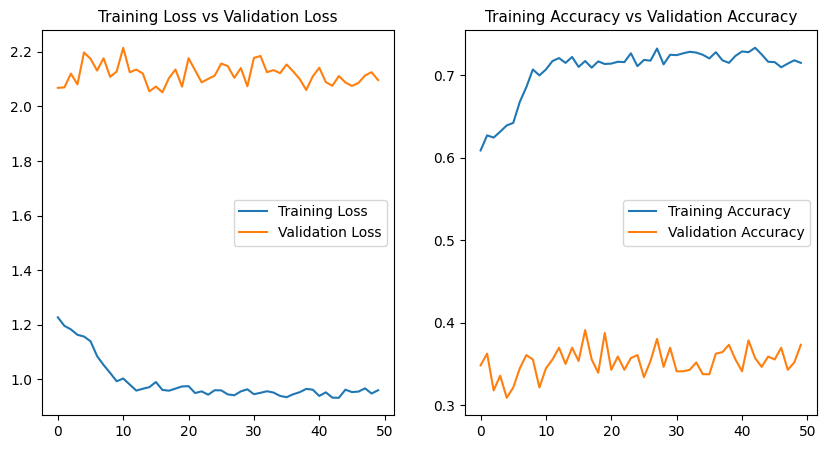

2/2 [==============================] - 34s 34s/step - loss: 2.0791 - accuracy: 0.3905
Loss 2.0791330337524414
Accuracy 0.39047619700431824


In [ ]:
plot_loss_accuracy(history_10,best_model_10)

In [ ]:
classif_report(best_model_10, testing, training)

<ipython-input-15-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


2/2 [==============================] - 1s 420ms/step
              precision    recall  f1-score   support

       angry       0.21      0.20      0.21        30
     disgust       0.52      0.43      0.47        30
        fear       0.35      0.30      0.32        30
       happy       0.50      0.60      0.55        30
     neutral       0.25      0.27      0.26        30
         sad       0.33      0.33      0.33        30
    surprise       0.61      0.67      0.63        30

    accuracy                           0.40       210
   macro avg       0.40      0.40      0.40       210
weighted avg       0.40      0.40      0.40       210



# Model 11: 

Refit model 10 on 4636 Training images

## MODEL 11 LAYERS

In [ ]:
with tf.device(device_name):
      top_model = VGG.output
      top_model = Flatten(name="flatten")(top_model)
      #FC_1
      top_model = Dense(896, activation='relu')(top_model)
      top_model = Dropout(0.20)(top_model)
      #Regularizer
      top_model = Dense(1024, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(top_model)
      
      output_layer = Dense(num_classes, activation='softmax')(top_model)


      model_11 = Model(inputs=VGG.input, outputs=output_layer) #only using VGG16 as is
      #print('VGG.input:',VGG.input)
      # tell the model what cost and optimization method to use
      model_11.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
      )
      model_11.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

## MODEL 11 FIT

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

tl_checkpoint_11 = ModelCheckpoint(filepath=path_models+'model_11_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                          patience=10,
                          restore_best_weights=True,
                          mode='min')

history_11 = model_11.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples,
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_11, early_stop, reduce_lr],
                      verbose=1)


KeyboardInterrupt: ignored

In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
history_11 = model_11.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)

Epoch 1/50
29/29 [==============================] - 3000s 104s/step - loss: 8.6391 - accuracy: 0.2235 - val_loss: 5.7322 - val_accuracy: 0.2729 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 11s 369ms/step - loss: 4.4760 - accuracy: 0.2863 - val_loss: 3.5204 - val_accuracy: 0.2977 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 10s 361ms/step - loss: 3.0656 - accuracy: 0.3117 - val_loss: 2.7083 - val_accuracy: 0.3128 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 11s 368ms/step - loss: 2.4594 - accuracy: 0.3173 - val_loss: 2.3149 - val_accuracy: 0.3150 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 11s 366ms/step - loss: 2.1514 - accuracy: 0.3316 - val_loss: 2.0648 - val_accuracy: 0.3366 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 10s 358ms/step - loss: 1.9571 - accuracy: 0.3500 - val_loss: 1.9949 - val_accuracy: 0.3020 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 11s 364ms/s

In [ ]:
#Model: save/loading
pickle.dump(model_11, open(path_models+'model_11_pckl.pkl', 'wb'))
model_11.save(path_models+'model_11')
#model_11 = tf.keras.models.load_model(path_models+'model_11')

#weights training history: save/load
np.save(os.path.join(path_models,'history_11.npy'),history_11.history)
#history_11=np.load(os.path.join(path_models,'history_11.npy'),allow_pickle='TRUE').item()

## MODEL 11 PLOTS

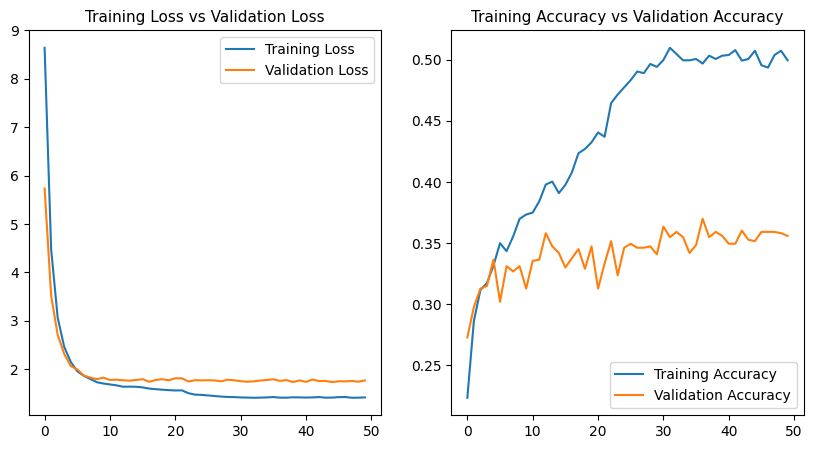

6/6 [==============================] - 392s 78s/step - loss: 1.7544 - accuracy: 0.3957
Loss 1.7544134855270386
Accuracy 0.39571428298950195


In [ ]:
plot_loss_accuracy(history_11,model_11)

In [ ]:
classif_report(model_11, testing, training)

<ipython-input-14-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


6/6 [==============================] - 2s 254ms/step
              precision    recall  f1-score   support

       angry       0.28      0.35      0.31       100
     disgust       0.62      0.42      0.50       100
        fear       0.32      0.25      0.28       100
       happy       0.42      0.46      0.44       100
     neutral       0.35      0.35      0.35       100
         sad       0.28      0.33      0.30       100
    surprise       0.52      0.52      0.52       100

    accuracy                           0.38       700
   macro avg       0.40      0.38      0.39       700
weighted avg       0.40      0.38      0.39       700



# Model 12 : Retraining the entire VGG16

## MODEL 12 LAYERS

In [ ]:

VGG_retrained = VGG16(include_top=True, weights=None, input_shape=IMG_SIZE, classes=num_classes, classifier_activation='softmax') 

for layer in VGG_retrained.layers:
    layer.trainable = True # Re-fitting of the weights

  


In [ ]:
with tf.device(device_name):
  model_12 = Model(inputs=VGG_retrained.input, outputs=VGG_retrained.output) #only using VGG16 as is
      #print('VGG.input:',VGG.input)
      # tell the model what cost and optimization method to use
  model_12.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_12.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

## MODEL 12 FIT

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

tl_checkpoint_12 = ModelCheckpoint(filepath=path_models+'model_12_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=False,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',
#                           patience=10,
#                           restore_best_weights=True,
#                           mode='min')

history_12 = model_12.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples//batch_size, #To make sure that we have "at least steps_per_epoch * epochs batches
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_12, reduce_lr],
                      verbose=1)


Epoch 1/50
29/57 [==============>...............] - ETA: 9s - loss: 1.9362 - accuracy: 0.1356


Epoch 1: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_12_weights.h5
57/57 [==============================] - 19s 242ms/step - loss: 1.9362 - accuracy: 0.1356 - val_loss: 1.9351 - val_accuracy: 0.1510 - lr: 0.0010


In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
history_12 = model_12.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples)

Epoch 1/50
29/29 [==============================] - 12s 408ms/step - loss: 1.9362 - accuracy: 0.1434 - val_loss: 1.9350 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 12s 416ms/step - loss: 1.9355 - accuracy: 0.1475 - val_loss: 1.9350 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 12s 416ms/step - loss: 1.9356 - accuracy: 0.1483 - val_loss: 1.9350 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 11s 392ms/step - loss: 1.9356 - accuracy: 0.1510 - val_loss: 1.9351 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 12s 417ms/step - loss: 1.9358 - accuracy: 0.1415 - val_loss: 1.9350 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 12s 415ms/step - loss: 1.9356 - accuracy: 0.1380 - val_loss: 1.9351 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 12s 399ms/st

In [ ]:
#Model: save/loading
pickle.dump(model_12, open(path_models+'model_12_pckl.pkl', 'wb'))
model_12.save(path_models+'model_12')
#model_12 = tf.keras.models.load_model(path_models+'model_12')

#weights training history: save/load
np.save(os.path.join(path_models,'history_12.npy'),history_12.history)
#history_12=np.load(os.path.join(path_models,'history_12.npy'),allow_pickle='TRUE').item()

## MODEL 12 PLOTS

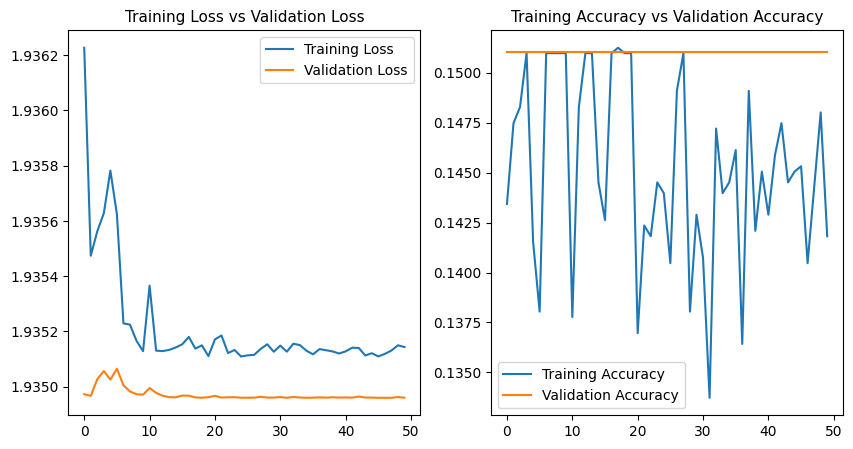

6/6 [==============================] - 2s 256ms/step - loss: 1.9585 - accuracy: 0.1429
Loss 1.9584527015686035
Accuracy 0.1428571492433548


In [ ]:
plot_loss_accuracy(history_12,model_12)

In [ ]:
classif_report(model_12, testing, training)

<ipython-input-9-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


6/6 [==============================] - 2s 310ms/step
              precision    recall  f1-score   support

       angry       0.14      1.00      0.25       100
     disgust       0.00      0.00      0.00       100
        fear       0.00      0.00      0.00       100
       happy       0.00      0.00      0.00       100
     neutral       0.00      0.00      0.00       100
         sad       0.00      0.00      0.00       100
    surprise       0.00      0.00      0.00       100

    accuracy                           0.14       700
   macro avg       0.02      0.14      0.04       700
weighted avg       0.02      0.14      0.04       700



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 13 :  Training the entire MobileNetV2

## Difference between VGG16 and MobileNetv2



Src: https://keras.io/api/applications#usage-examples-for-image-classification-models

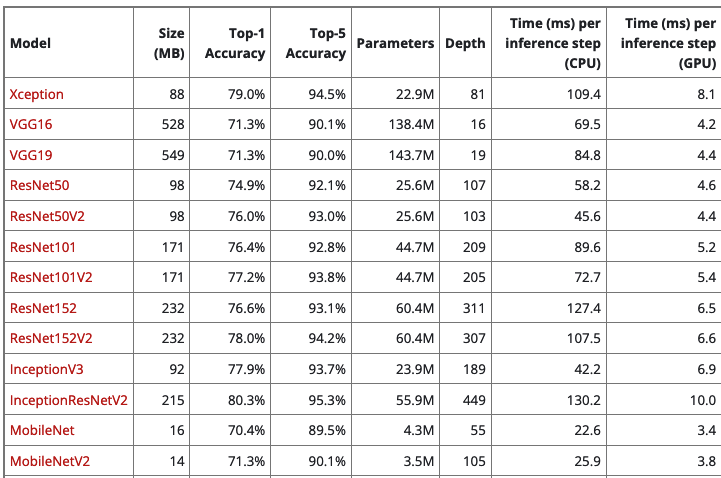

src: https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c

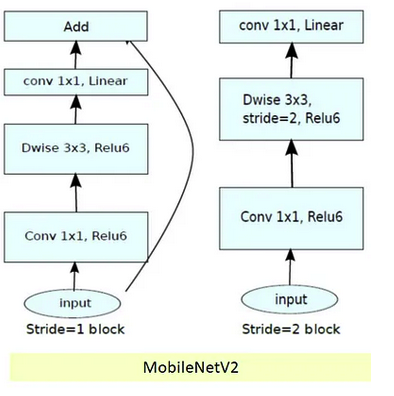

# MODEL 13 LAYERS

## MODEL 13 LAYERS

In [ ]:

MNV2 = MobileNetV2(input_shape=IMG_SIZE,
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)

for layer in MNV2.layers:
  layer.trainable =  True


In [ ]:
with tf.device(device_name):
  model_13 = Model(inputs=MNV2.input, outputs=MNV2.output)
      
  model_13.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_13.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

## MODEL 13 FIT

In [ ]:
#Batch_size = 150
#min_lr=0.00001

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

tl_checkpoint_13 = ModelCheckpoint(filepath=path_models+'model_13_weights.h5',
                                  monitor='val_accuracy',
                                  save_best_only=False,
                                  mode='max',
                                  verbose=1)
# EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',
#                           patience=10,
#                           restore_best_weights=True,
#                           mode='min')

history_13 = model_13.fit(training,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=validation,
                      steps_per_epoch=training.samples//batch_size, #To make sure that we have "at least steps_per_epoch * epochs batches
                      validation_steps=validation.samples,
                      callbacks=[tl_checkpoint_13, reduce_lr],
                      verbose=1)


Epoch 1/150
57/57 [==============================] - ETA: 0s - loss: 1.0397 - accuracy: 0.6206
Epoch 1: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 200ms/step - loss: 1.0397 - accuracy: 0.6206 - lr: 0.0010
Epoch 2/150
57/57 [==============================] - ETA: 0s - loss: 1.0140 - accuracy: 0.6379
Epoch 2: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 1.0140 - accuracy: 0.6379 - lr: 0.0010
Epoch 3/150
57/57 [==============================] - ETA: 0s - loss: 1.0148 - accuracy: 0.6294
Epoch 3: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 195ms/step - loss: 1.0148 - accuracy: 0.6294 - lr: 0.0010
Epoch 4/150
57/57 [==============================] - ETA: 0s - loss: 0.9974 - accuracy: 0.6310
Epoch 4: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.9974 - accuracy: 0.6310 - lr: 0.0010
Epoch 5/150
57/57 [==============================] - ETA: 0s - loss: 0.9477 - accuracy: 0.6549
Epoch 5: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 175ms/step - loss: 0.9477 - accuracy: 0.6549 - lr: 0.0010
Epoch 6/150
57/57 [==============================] - ETA: 0s - loss: 0.9604 - accuracy: 0.6631
Epoch 6: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 178ms/step - loss: 0.9604 - accuracy: 0.6631 - lr: 0.0010
Epoch 7/150
57/57 [==============================] - ETA: 0s - loss: 0.9465 - accuracy: 0.6601
Epoch 7: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.9465 - accuracy: 0.6601 - lr: 0.0010
Epoch 8/150
57/57 [==============================] - ETA: 0s - loss: 0.9351 - accuracy: 0.6620
Epoch 8: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.9351 - accuracy: 0.6620 - lr: 0.0010
Epoch 9/150
57/57 [==============================] - ETA: 0s - loss: 0.9058 - accuracy: 0.6700
Epoch 9: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 177ms/step - loss: 0.9058 - accuracy: 0.6700 - lr: 0.0010
Epoch 10/150
57/57 [==============================] - ETA: 0s - loss: 0.8907 - accuracy: 0.6711
Epoch 10: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.8907 - accuracy: 0.6711 - lr: 0.0010
Epoch 11/150
57/57 [==============================] - ETA: 0s - loss: 0.8726 - accuracy: 0.6807
Epoch 11: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 194ms/step - loss: 0.8726 - accuracy: 0.6807 - lr: 0.0010
Epoch 12/150
57/57 [==============================] - ETA: 0s - loss: 0.8309 - accuracy: 0.7023
Epoch 12: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.8309 - accuracy: 0.7023 - lr: 0.0010
Epoch 13/150
57/57 [==============================] - ETA: 0s - loss: 0.8209 - accuracy: 0.7144
Epoch 13: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.8209 - accuracy: 0.7144 - lr: 0.0010
Epoch 14/150
57/57 [==============================] - ETA: 0s - loss: 0.8198 - accuracy: 0.7048
Epoch 14: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.8198 - accuracy: 0.7048 - lr: 0.0010
Epoch 15/150
57/57 [==============================] - ETA: 0s - loss: 0.8409 - accuracy: 0.6971
Epoch 15: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.8409 - accuracy: 0.6971 - lr: 0.0010
Epoch 16/150
57/57 [==============================] - ETA: 0s - loss: 0.8118 - accuracy: 0.7185
Epoch 16: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 170ms/step - loss: 0.8118 - accuracy: 0.7185 - lr: 0.0010
Epoch 17/150
57/57 [==============================] - ETA: 0s - loss: 0.7851 - accuracy: 0.7163
Epoch 17: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.7851 - accuracy: 0.7163 - lr: 0.0010
Epoch 18/150
57/57 [==============================] - ETA: 0s - loss: 0.7765 - accuracy: 0.7246
Epoch 18: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.7765 - accuracy: 0.7246 - lr: 0.0010
Epoch 19/150
57/57 [==============================] - ETA: 0s - loss: 0.7521 - accuracy: 0.7322
Epoch 19: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.7521 - accuracy: 0.7322 - lr: 0.0010
Epoch 20/150
57/57 [==============================] - ETA: 0s - loss: 0.7432 - accuracy: 0.7407
Epoch 20: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.7432 - accuracy: 0.7407 - lr: 0.0010
Epoch 21/150
57/57 [==============================] - ETA: 0s - loss: 0.7531 - accuracy: 0.7257
Epoch 21: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 176ms/step - loss: 0.7531 - accuracy: 0.7257 - lr: 0.0010
Epoch 22/150
57/57 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.7460
Epoch 22: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 197ms/step - loss: 0.7133 - accuracy: 0.7460 - lr: 0.0010
Epoch 23/150
57/57 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.7506
Epoch 23: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 194ms/step - loss: 0.6946 - accuracy: 0.7506 - lr: 0.0010
Epoch 24/150
57/57 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7501
Epoch 24: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.6900 - accuracy: 0.7501 - lr: 0.0010
Epoch 25/150
57/57 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7498
Epoch 25: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.6970 - accuracy: 0.7498 - lr: 0.0010
Epoch 26/150
57/57 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.7684
Epoch 26: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.6566 - accuracy: 0.7684 - lr: 0.0010
Epoch 27/150
57/57 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.7684
Epoch 27: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.6420 - accuracy: 0.7684 - lr: 0.0010
Epoch 28/150
57/57 [==============================] - ETA: 0s - loss: 0.6532 - accuracy: 0.7635
Epoch 28: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 183ms/step - loss: 0.6532 - accuracy: 0.7635 - lr: 0.0010
Epoch 29/150
57/57 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.7687
Epoch 29: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.6342 - accuracy: 0.7687 - lr: 0.0010
Epoch 30/150
57/57 [==============================] - ETA: 0s - loss: 0.6126 - accuracy: 0.7742
Epoch 30: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.6126 - accuracy: 0.7742 - lr: 0.0010
Epoch 31/150
57/57 [==============================] - ETA: 0s - loss: 0.6344 - accuracy: 0.7752
Epoch 31: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 180ms/step - loss: 0.6344 - accuracy: 0.7752 - lr: 0.0010
Epoch 32/150
57/57 [==============================] - ETA: 0s - loss: 0.5737 - accuracy: 0.7948
Epoch 32: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.5737 - accuracy: 0.7948 - lr: 0.0010
Epoch 33/150
57/57 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.7893
Epoch 33: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.5886 - accuracy: 0.7893 - lr: 0.0010
Epoch 34/150
57/57 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.8112
Epoch 34: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.5394 - accuracy: 0.8112 - lr: 0.0010
Epoch 35/150
57/57 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.7970
Epoch 35: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.5682 - accuracy: 0.7970 - lr: 0.0010
Epoch 36/150
57/57 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7967
Epoch 36: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.5782 - accuracy: 0.7967 - lr: 0.0010
Epoch 37/150
57/57 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.7948
Epoch 37: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 192ms/step - loss: 0.5824 - accuracy: 0.7948 - lr: 0.0010
Epoch 38/150
57/57 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.8195
Epoch 38: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.5272 - accuracy: 0.8195 - lr: 0.0010
Epoch 39/150
57/57 [==============================] - ETA: 0s - loss: 0.5286 - accuracy: 0.8102
Epoch 39: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.5286 - accuracy: 0.8102 - lr: 0.0010
Epoch 40/150
57/57 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.8115
Epoch 40: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 192ms/step - loss: 0.5119 - accuracy: 0.8115 - lr: 0.0010
Epoch 41/150
57/57 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.8025
Epoch 41: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.5492 - accuracy: 0.8025 - lr: 0.0010
Epoch 42/150
57/57 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.8266
Epoch 42: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 183ms/step - loss: 0.4985 - accuracy: 0.8266 - lr: 0.0010
Epoch 43/150
57/57 [==============================] - ETA: 0s - loss: 0.4897 - accuracy: 0.8236
Epoch 43: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.4897 - accuracy: 0.8236 - lr: 0.0010
Epoch 44/150
57/57 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.8258
Epoch 44: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.4979 - accuracy: 0.8258 - lr: 0.0010
Epoch 45/150
57/57 [==============================] - ETA: 0s - loss: 0.5103 - accuracy: 0.8173
Epoch 45: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.5103 - accuracy: 0.8173 - lr: 0.0010
Epoch 46/150
57/57 [==============================] - ETA: 0s - loss: 0.5063 - accuracy: 0.8219
Epoch 46: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.5063 - accuracy: 0.8219 - lr: 0.0010
Epoch 47/150
57/57 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8307
Epoch 47: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.4849 - accuracy: 0.8307 - lr: 0.0010
Epoch 48/150
57/57 [==============================] - ETA: 0s - loss: 0.4762 - accuracy: 0.8354
Epoch 48: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 192ms/step - loss: 0.4762 - accuracy: 0.8354 - lr: 0.0010
Epoch 49/150
57/57 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.8343
Epoch 49: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 168ms/step - loss: 0.4731 - accuracy: 0.8343 - lr: 0.0010
Epoch 50/150
57/57 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8524
Epoch 50: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 180ms/step - loss: 0.4395 - accuracy: 0.8524 - lr: 0.0010
Epoch 51/150
57/57 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.8346
Epoch 51: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 191ms/step - loss: 0.4582 - accuracy: 0.8346 - lr: 0.0010
Epoch 52/150
57/57 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.8431
Epoch 52: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 191ms/step - loss: 0.4550 - accuracy: 0.8431 - lr: 0.0010
Epoch 53/150
57/57 [==============================] - ETA: 0s - loss: 0.4454 - accuracy: 0.8425
Epoch 53: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.4454 - accuracy: 0.8425 - lr: 0.0010
Epoch 54/150
57/57 [==============================] - ETA: 0s - loss: 0.4076 - accuracy: 0.8568
Epoch 54: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.4076 - accuracy: 0.8568 - lr: 0.0010
Epoch 55/150
57/57 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.8458
Epoch 55: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 194ms/step - loss: 0.4345 - accuracy: 0.8458 - lr: 0.0010
Epoch 56/150
57/57 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8436
Epoch 56: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.4390 - accuracy: 0.8436 - lr: 0.0010
Epoch 57/150
57/57 [==============================] - ETA: 0s - loss: 0.4245 - accuracy: 0.8598
Epoch 57: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.4245 - accuracy: 0.8598 - lr: 0.0010
Epoch 58/150
57/57 [==============================] - ETA: 0s - loss: 0.3994 - accuracy: 0.8628
Epoch 58: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.3994 - accuracy: 0.8628 - lr: 0.0010
Epoch 59/150
57/57 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.8650
Epoch 59: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.3790 - accuracy: 0.8650 - lr: 0.0010
Epoch 60/150
57/57 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8628
Epoch 60: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 174ms/step - loss: 0.3870 - accuracy: 0.8628 - lr: 0.0010
Epoch 61/150
57/57 [==============================] - ETA: 0s - loss: 0.3840 - accuracy: 0.8636
Epoch 61: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.3840 - accuracy: 0.8636 - lr: 0.0010
Epoch 62/150
57/57 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8653
Epoch 62: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.3891 - accuracy: 0.8653 - lr: 0.0010
Epoch 63/150
57/57 [==============================] - ETA: 0s - loss: 0.3868 - accuracy: 0.8647
Epoch 63: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.3868 - accuracy: 0.8647 - lr: 0.0010
Epoch 64/150
57/57 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8749
Epoch 64: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.3560 - accuracy: 0.8749 - lr: 0.0010
Epoch 65/150
57/57 [==============================] - ETA: 0s - loss: 0.3661 - accuracy: 0.8694
Epoch 65: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.3661 - accuracy: 0.8694 - lr: 0.0010
Epoch 66/150
57/57 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.8754
Epoch 66: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 191ms/step - loss: 0.3826 - accuracy: 0.8754 - lr: 0.0010
Epoch 67/150
57/57 [==============================] - ETA: 0s - loss: 0.3442 - accuracy: 0.8793
Epoch 67: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.3442 - accuracy: 0.8793 - lr: 0.0010
Epoch 68/150
57/57 [==============================] - ETA: 0s - loss: 0.3443 - accuracy: 0.8815
Epoch 68: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 192ms/step - loss: 0.3443 - accuracy: 0.8815 - lr: 0.0010
Epoch 69/150
57/57 [==============================] - ETA: 0s - loss: 0.3429 - accuracy: 0.8809
Epoch 69: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 183ms/step - loss: 0.3429 - accuracy: 0.8809 - lr: 0.0010
Epoch 70/150
57/57 [==============================] - ETA: 0s - loss: 0.3791 - accuracy: 0.8617
Epoch 70: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.3791 - accuracy: 0.8617 - lr: 0.0010
Epoch 71/150
57/57 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.8771
Epoch 71: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.3468 - accuracy: 0.8771 - lr: 0.0010
Epoch 72/150
57/57 [==============================] - ETA: 0s - loss: 0.3327 - accuracy: 0.8820
Epoch 72: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 173ms/step - loss: 0.3327 - accuracy: 0.8820 - lr: 0.0010
Epoch 73/150
57/57 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.8897
Epoch 73: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 179ms/step - loss: 0.3169 - accuracy: 0.8897 - lr: 0.0010
Epoch 74/150
57/57 [==============================] - ETA: 0s - loss: 0.3391 - accuracy: 0.8826
Epoch 74: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.3391 - accuracy: 0.8826 - lr: 0.0010
Epoch 75/150
57/57 [==============================] - ETA: 0s - loss: 0.3123 - accuracy: 0.8938
Epoch 75: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.3123 - accuracy: 0.8938 - lr: 0.0010
Epoch 76/150
57/57 [==============================] - ETA: 0s - loss: 0.3620 - accuracy: 0.8815
Epoch 76: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.3620 - accuracy: 0.8815 - lr: 0.0010
Epoch 77/150
57/57 [==============================] - ETA: 0s - loss: 0.3665 - accuracy: 0.8713
Epoch 77: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 199ms/step - loss: 0.3665 - accuracy: 0.8713 - lr: 0.0010
Epoch 78/150
57/57 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8840
Epoch 78: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.3365 - accuracy: 0.8840 - lr: 0.0010
Epoch 79/150
57/57 [==============================] - ETA: 0s - loss: 0.3024 - accuracy: 0.8955
Epoch 79: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.3024 - accuracy: 0.8955 - lr: 0.0010
Epoch 80/150
57/57 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.8889
Epoch 80: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 179ms/step - loss: 0.3184 - accuracy: 0.8889 - lr: 0.0010
Epoch 81/150
57/57 [==============================] - ETA: 0s - loss: 0.3111 - accuracy: 0.8936
Epoch 81: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 191ms/step - loss: 0.3111 - accuracy: 0.8936 - lr: 0.0010
Epoch 82/150
57/57 [==============================] - ETA: 0s - loss: 0.3076 - accuracy: 0.8905
Epoch 82: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.3076 - accuracy: 0.8905 - lr: 0.0010
Epoch 83/150
57/57 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8985
Epoch 83: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.2983 - accuracy: 0.8985 - lr: 0.0010
Epoch 84/150
57/57 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8905
Epoch 84: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 183ms/step - loss: 0.3180 - accuracy: 0.8905 - lr: 0.0010
Epoch 85/150
57/57 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.9037
Epoch 85: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2823 - accuracy: 0.9037 - lr: 0.0010
Epoch 86/150
57/57 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9051
Epoch 86: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2721 - accuracy: 0.9051 - lr: 0.0010
Epoch 87/150
57/57 [==============================] - ETA: 0s - loss: 0.2936 - accuracy: 0.8985
Epoch 87: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2936 - accuracy: 0.8985 - lr: 0.0010
Epoch 88/150
57/57 [==============================] - ETA: 0s - loss: 0.2774 - accuracy: 0.9053
Epoch 88: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2774 - accuracy: 0.9053 - lr: 0.0010
Epoch 89/150
57/57 [==============================] - ETA: 0s - loss: 0.2765 - accuracy: 0.9089
Epoch 89: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.2765 - accuracy: 0.9089 - lr: 0.0010
Epoch 90/150
57/57 [==============================] - ETA: 0s - loss: 0.2635 - accuracy: 0.9122
Epoch 90: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 191ms/step - loss: 0.2635 - accuracy: 0.9122 - lr: 0.0010
Epoch 91/150
57/57 [==============================] - ETA: 0s - loss: 0.3011 - accuracy: 0.9007
Epoch 91: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.3011 - accuracy: 0.9007 - lr: 0.0010
Epoch 92/150
57/57 [==============================] - ETA: 0s - loss: 0.3151 - accuracy: 0.8952
Epoch 92: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.3151 - accuracy: 0.8952 - lr: 0.0010
Epoch 93/150
57/57 [==============================] - ETA: 0s - loss: 0.3251 - accuracy: 0.8908
Epoch 93: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.3251 - accuracy: 0.8908 - lr: 0.0010
Epoch 94/150
57/57 [==============================] - ETA: 0s - loss: 0.2877 - accuracy: 0.9051
Epoch 94: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.2877 - accuracy: 0.9051 - lr: 0.0010
Epoch 95/150
57/57 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9053
Epoch 95: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 171ms/step - loss: 0.2808 - accuracy: 0.9053 - lr: 0.0010
Epoch 96/150
57/57 [==============================] - ETA: 0s - loss: 0.3087 - accuracy: 0.8966
Epoch 96: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 194ms/step - loss: 0.3087 - accuracy: 0.8966 - lr: 0.0010
Epoch 97/150
57/57 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.9147
Epoch 97: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2614 - accuracy: 0.9147 - lr: 0.0010
Epoch 98/150
57/57 [==============================] - ETA: 0s - loss: 0.2744 - accuracy: 0.8996
Epoch 98: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2744 - accuracy: 0.8996 - lr: 0.0010
Epoch 99/150
57/57 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.9018
Epoch 99: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 168ms/step - loss: 0.2870 - accuracy: 0.9018 - lr: 0.0010
Epoch 100/150
57/57 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.9067
Epoch 100: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 178ms/step - loss: 0.2727 - accuracy: 0.9067 - lr: 0.0010
Epoch 101/150
57/57 [==============================] - ETA: 0s - loss: 0.2532 - accuracy: 0.9152
Epoch 101: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2532 - accuracy: 0.9152 - lr: 0.0010
Epoch 102/150
57/57 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.9169
Epoch 102: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.2449 - accuracy: 0.9169 - lr: 0.0010
Epoch 103/150
57/57 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.9095
Epoch 103: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2681 - accuracy: 0.9095 - lr: 0.0010
Epoch 104/150
57/57 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9108
Epoch 104: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.2450 - accuracy: 0.9108 - lr: 0.0010
Epoch 105/150
57/57 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.8999
Epoch 105: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 195ms/step - loss: 0.2964 - accuracy: 0.8999 - lr: 0.0010
Epoch 106/150
57/57 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9202
Epoch 106: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.2305 - accuracy: 0.9202 - lr: 0.0010
Epoch 107/150
57/57 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9204
Epoch 107: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 181ms/step - loss: 0.2388 - accuracy: 0.9204 - lr: 0.0010
Epoch 108/150
57/57 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.9199
Epoch 108: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 195ms/step - loss: 0.2377 - accuracy: 0.9199 - lr: 0.0010
Epoch 109/150
57/57 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.9199
Epoch 109: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 195ms/step - loss: 0.2452 - accuracy: 0.9199 - lr: 0.0010
Epoch 110/150
57/57 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.9141
Epoch 110: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 196ms/step - loss: 0.2515 - accuracy: 0.9141 - lr: 0.0010
Epoch 111/150
57/57 [==============================] - ETA: 0s - loss: 0.2594 - accuracy: 0.9139
Epoch 111: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.2594 - accuracy: 0.9139 - lr: 0.0010
Epoch 112/150
57/57 [==============================] - ETA: 0s - loss: 0.2754 - accuracy: 0.9043
Epoch 112: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2754 - accuracy: 0.9043 - lr: 0.0010
Epoch 113/150
57/57 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.9067
Epoch 113: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.2698 - accuracy: 0.9067 - lr: 0.0010
Epoch 114/150
57/57 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9185
Epoch 114: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 178ms/step - loss: 0.2335 - accuracy: 0.9185 - lr: 0.0010
Epoch 115/150
57/57 [==============================] - ETA: 0s - loss: 0.2241 - accuracy: 0.9246
Epoch 115: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 177ms/step - loss: 0.2241 - accuracy: 0.9246 - lr: 0.0010
Epoch 116/150
57/57 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9191
Epoch 116: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2368 - accuracy: 0.9191 - lr: 0.0010
Epoch 117/150
57/57 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.9048
Epoch 117: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 193ms/step - loss: 0.2870 - accuracy: 0.9048 - lr: 0.0010
Epoch 118/150
57/57 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9103
Epoch 118: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2692 - accuracy: 0.9103 - lr: 0.0010
Epoch 119/150
57/57 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9086
Epoch 119: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 171ms/step - loss: 0.2873 - accuracy: 0.9086 - lr: 0.0010
Epoch 120/150
57/57 [==============================] - ETA: 0s - loss: 0.2462 - accuracy: 0.9125
Epoch 120: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2462 - accuracy: 0.9125 - lr: 0.0010
Epoch 121/150
57/57 [==============================] - ETA: 0s - loss: 0.2353 - accuracy: 0.9158
Epoch 121: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 194ms/step - loss: 0.2353 - accuracy: 0.9158 - lr: 0.0010
Epoch 122/150
57/57 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9141
Epoch 122: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 184ms/step - loss: 0.2450 - accuracy: 0.9141 - lr: 0.0010
Epoch 123/150
57/57 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9188
Epoch 123: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2374 - accuracy: 0.9188 - lr: 0.0010
Epoch 124/150
57/57 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9232
Epoch 124: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 179ms/step - loss: 0.2138 - accuracy: 0.9232 - lr: 0.0010
Epoch 125/150
57/57 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.9224
Epoch 125: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2280 - accuracy: 0.9224 - lr: 0.0010
Epoch 126/150
57/57 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9306
Epoch 126: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.2110 - accuracy: 0.9306 - lr: 0.0010
Epoch 127/150
57/57 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9188
Epoch 127: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 182ms/step - loss: 0.2257 - accuracy: 0.9188 - lr: 0.0010
Epoch 128/150
57/57 [==============================] - ETA: 0s - loss: 0.1996 - accuracy: 0.9336
Epoch 128: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.1996 - accuracy: 0.9336 - lr: 0.0010
Epoch 129/150
57/57 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9215
Epoch 129: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2174 - accuracy: 0.9215 - lr: 0.0010
Epoch 130/150
57/57 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9166
Epoch 130: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 183ms/step - loss: 0.2424 - accuracy: 0.9166 - lr: 0.0010
Epoch 131/150
57/57 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9082
Epoch 131: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.2692 - accuracy: 0.9082 - lr: 0.0010
Epoch 132/150
57/57 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9235
Epoch 132: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 173ms/step - loss: 0.2279 - accuracy: 0.9235 - lr: 0.0010
Epoch 133/150
57/57 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9273
Epoch 133: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 184ms/step - loss: 0.2127 - accuracy: 0.9273 - lr: 0.0010
Epoch 134/150
57/57 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9215
Epoch 134: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.2231 - accuracy: 0.9215 - lr: 0.0010
Epoch 135/150
57/57 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.9237
Epoch 135: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 192ms/step - loss: 0.2307 - accuracy: 0.9237 - lr: 0.0010
Epoch 136/150
57/57 [==============================] - ETA: 0s - loss: 0.2261 - accuracy: 0.9213
Epoch 136: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 175ms/step - loss: 0.2261 - accuracy: 0.9213 - lr: 0.0010
Epoch 137/150
57/57 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9344
Epoch 137: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 179ms/step - loss: 0.2011 - accuracy: 0.9344 - lr: 0.0010
Epoch 138/150
57/57 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9347
Epoch 138: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 185ms/step - loss: 0.2089 - accuracy: 0.9347 - lr: 0.0010
Epoch 139/150
57/57 [==============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9385
Epoch 139: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.1848 - accuracy: 0.9385 - lr: 0.0010
Epoch 140/150
57/57 [==============================] - ETA: 0s - loss: 0.1697 - accuracy: 0.9405
Epoch 140: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 186ms/step - loss: 0.1697 - accuracy: 0.9405 - lr: 0.0010
Epoch 141/150
57/57 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9254
Epoch 141: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 198ms/step - loss: 0.2191 - accuracy: 0.9254 - lr: 0.0010
Epoch 142/150
57/57 [==============================] - ETA: 0s - loss: 0.1755 - accuracy: 0.9416
Epoch 142: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 195ms/step - loss: 0.1755 - accuracy: 0.9416 - lr: 0.0010
Epoch 143/150
57/57 [==============================] - ETA: 0s - loss: 0.2087 - accuracy: 0.9311
Epoch 143: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 187ms/step - loss: 0.2087 - accuracy: 0.9311 - lr: 0.0010
Epoch 144/150
57/57 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9380
Epoch 144: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 196ms/step - loss: 0.1895 - accuracy: 0.9380 - lr: 0.0010
Epoch 145/150
57/57 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9342
Epoch 145: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 188ms/step - loss: 0.1906 - accuracy: 0.9342 - lr: 0.0010
Epoch 146/150
57/57 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9281
Epoch 146: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 175ms/step - loss: 0.2106 - accuracy: 0.9281 - lr: 0.0010
Epoch 147/150
57/57 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9298
Epoch 147: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 189ms/step - loss: 0.2207 - accuracy: 0.9298 - lr: 0.0010
Epoch 148/150
57/57 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9262
Epoch 148: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 11s 190ms/step - loss: 0.2106 - accuracy: 0.9262 - lr: 0.0010
Epoch 149/150
57/57 [==============================] - ETA: 0s - loss: 0.1971 - accuracy: 0.9322
Epoch 149: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 178ms/step - loss: 0.1971 - accuracy: 0.9322 - lr: 0.0010
Epoch 150/150
57/57 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9246
Epoch 150: saving model to /content/drive/MyDrive/CP_Emotion_Recog/savedmodels/model_13_weights.h5


57/57 [==============================] - 10s 180ms/step - loss: 0.2242 - accuracy: 0.9246 - lr: 0.0010


In [ ]:
#Trained the model with top layers
#with tf.device('/device:GPU:0'):
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_13 = model_13.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples

Epoch 1/150
58/58 [==============================] - 12s 202ms/step - loss: 0.0424 - accuracy: 0.9849 - val_loss: 3.7388 - val_accuracy: 0.4380 - lr: 2.0000e-04
Epoch 2/150
58/58 [==============================] - 12s 203ms/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 3.6813 - val_accuracy: 0.4326 - lr: 2.0000e-04
Epoch 3/150
58/58 [==============================] - 12s 202ms/step - loss: 0.0463 - accuracy: 0.9827 - val_loss: 3.8062 - val_accuracy: 0.4207 - lr: 2.0000e-04
Epoch 4/150
58/58 [==============================] - 12s 199ms/step - loss: 0.0449 - accuracy: 0.9833 - val_loss: 3.5196 - val_accuracy: 0.4520 - lr: 2.0000e-04
Epoch 5/150
58/58 [==============================] - 11s 194ms/step - loss: 0.0413 - accuracy: 0.9862 - val_loss: 3.6676 - val_accuracy: 0.4110 - lr: 2.0000e-04
Epoch 6/150
58/58 [==============================] - 12s 202ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 3.7574 - val_accuracy: 0.4186 - lr: 2.0000e-04
Epoch 7/150
58/58 [===============

In [ ]:
#Model: save/loading
pickle.dump(model_13, open(path_models+'model_13_pckl.pkl', 'wb'))
model_13.save(path_models+'model_13')
#model_13 = tf.keras.models.load_model(path_models+'model_13')

#weights training history: save/load
np.save(os.path.join(path_models,'history_13.npy'),history_13.history)
#history_13=np.load(os.path.join(path_models,'history_13.npy'),allow_pickle='TRUE').item()

## MODEL 13 PLOTS

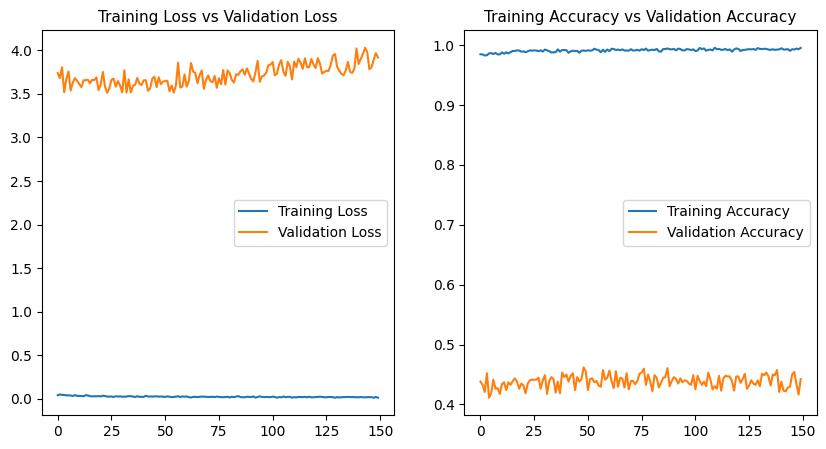

11/11 [==============================] - 2s 157ms/step - loss: 3.5780 - accuracy: 0.4800
Loss 3.57802414894104
Accuracy 0.47999998927116394


In [ ]:
plot_loss_accuracy(history_13,model_13)

In [ ]:
classif_report(model_13, testing, training)

<ipython-input-9-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


11/11 [==============================] - 2s 144ms/step
              precision    recall  f1-score   support

       angry       0.30      0.33      0.31       100
     disgust       0.79      0.66      0.72       100
        fear       0.29      0.27      0.28       100
       happy       0.64      0.59      0.61       100
     neutral       0.34      0.39      0.36       100
         sad       0.32      0.30      0.31       100
    surprise       0.61      0.68      0.64       100

    accuracy                           0.46       700
   macro avg       0.47      0.46      0.46       700
weighted avg       0.47      0.46      0.46       700



# Model 14 - Fine Tunning : Partial retraining 

We will train only the last 40 layers

fine-tuning, which consists of unfreezing the entire model you obtained above (or part of it), and re-training it on the new data with a very low learning rate. This can potentially achieve meaningful improvements, by incrementally adapting the pretrained features to the new data.

scr: https://keras.io/guides/transfer_learning/



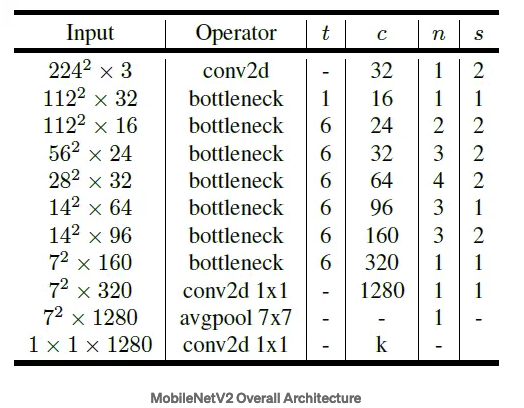

## MODEL 14 LAYERS

In [ ]:
#NOTE: We can not instantiate the model with pre-trained weigths (imagenets)
# while having only 7 classes on the output. ( imagenets requires 1000 classes).
# So, although we partially re-use the imagenet weigths, we still have to get rid of the Top-Layers to be able to use only 7 classes
MNV2 = MobileNetV2(
    input_shape=IMG_SIZE,
    alpha=1.0,
    include_top=False, #We only want 7 classes (see Note)
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)



9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
MNV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
#Number of layers without the top:
layers = MNV2.layers
print("MNV2 layers ( No Top): ",len(layers))

MNV2 layers ( No Top):  154


In [ ]:
#Only the last 40 Top layers are trainable: BLOCK 12
for layer in MNV2.layers[:-40]:
  layer.trainable =  False

In [ ]:
x = MNV2.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(7, activation="softmax")(x)

model_14 = Model(inputs=MNV2.input, outputs=x)

model_14.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
model_14.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [ ]:
m14_layers = model_14.layers
print("Model_14 Total layers: ",len(m14_layers))

Model_14 Total layers:  156


## MODEL 14 FIT

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# tl_checkpoint_14 = ModelCheckpoint(filepath=path_models+'model_14_weights.h5',
#                                   monitor='val_accuracy',
#                                   save_best_only=False,
#                                   mode='max',
#                                   verbose=1)
# # EarlyStopping
# # early_stop = EarlyStopping(monitor='val_loss',
# #                           patience=10,
# #                           restore_best_weights=True,
# #                           mode='min')

# history_14 = model_14.fit(training,
#                       batch_size=batch_size,
#                       epochs=epochs,
#                       validation_data=validation,
#                       steps_per_epoch=training.samples//batch_size, #To make sure that we have "at least steps_per_epoch * epochs batches
#                       validation_steps=validation.samples,
#                       callbacks=[tl_checkpoint_14, reduce_lr],
#                       verbose=1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_14 = model_14.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples

Epoch 1/150
58/58 [==============================] - 3057s 53s/step - loss: 1.9772 - accuracy: 0.2551 - val_loss: 15.1863 - val_accuracy: 0.1586 - lr: 0.0010
Epoch 2/150
58/58 [==============================] - 12s 210ms/step - loss: 1.8004 - accuracy: 0.3004 - val_loss: 8.7311 - val_accuracy: 0.1931 - lr: 0.0010
Epoch 3/150
58/58 [==============================] - 12s 209ms/step - loss: 1.7531 - accuracy: 0.3295 - val_loss: 5.3617 - val_accuracy: 0.1899 - lr: 0.0010
Epoch 4/150
58/58 [==============================] - 12s 209ms/step - loss: 1.7071 - accuracy: 0.3594 - val_loss: 5.0903 - val_accuracy: 0.2093 - lr: 0.0010
Epoch 5/150
58/58 [==============================] - 12s 206ms/step - loss: 1.6404 - accuracy: 0.3853 - val_loss: 6.4786 - val_accuracy: 0.2643 - lr: 0.0010
Epoch 6/150
58/58 [==============================] - 12s 209ms/step - loss: 1.5500 - accuracy: 0.4260 - val_loss: 7.6418 - val_accuracy: 0.2082 - lr: 0.0010
Epoch 7/150
58/58 [==============================] - 12s 

In [ ]:
#Model: save/loading
pickle.dump(model_14, open(path_models+'model_14_pckl.pkl', 'wb'))
model_14.save(path_models+'model_14')
#model_14 = tf.keras.models.load_model(path_models+'model_14')

#weights training history: save/load
np.save(os.path.join(path_models,'history_14.npy'),history_14.history)
#history_14=np.load(os.path.join(path_models,'history_14.npy'),allow_pickle='TRUE').item()

## MODEL 14 PLOTS

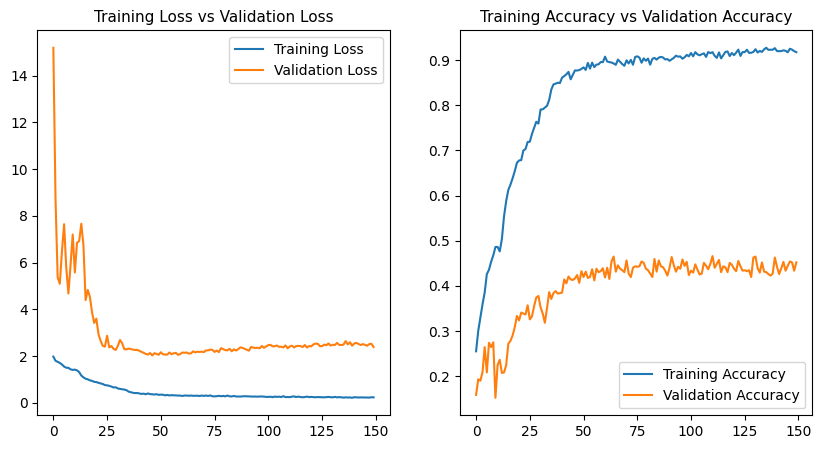

11/11 [==============================] - 375s 38s/step - loss: 2.7392 - accuracy: 0.4371
Loss 2.739210844039917
Accuracy 0.43714284896850586


In [ ]:
plot_loss_accuracy(history_14,model_14)

In [ ]:
classif_report(model_14, testing, training)

<ipython-input-28-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


11/11 [==============================] - 3s 158ms/step
              precision    recall  f1-score   support

       angry       0.30      0.32      0.31       100
     disgust       0.71      0.64      0.67       100
        fear       0.31      0.31      0.31       100
       happy       0.50      0.48      0.49       100
     neutral       0.33      0.36      0.34       100
         sad       0.20      0.20      0.20       100
    surprise       0.65      0.64      0.65       100

    accuracy                           0.42       700
   macro avg       0.43      0.42      0.42       700
weighted avg       0.43      0.42      0.42       700



# Model 15 - Fine Tunning : Partial retraining 

DATASET = 1000 Per Emotion / (436 on Disgust)

This time we will only train the last 21 layers



## MODEL 15 LAYERS

In [ ]:
MNV2_15 = MobileNetV2(
    input_shape=IMG_SIZE,
    alpha=1.0,
    include_top=False, #We only want 7 classes (see Note)
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)


In [ ]:
MNV2_15.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
layers = MNV2_15.layers
print("MNV2_15 layers ( No Top): ",len(layers))

MNV2_15 layers ( No Top):  154


In [ ]:
for layer in MNV2_15.layers[:-21]: #Slipt 1/2 the previous trainable layers since the accuracy dropped from training the full MN
  layer.trainable =  False

In [ ]:
x = MNV2_15.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(7, activation="softmax")(x)

model_15 = Model(inputs=MNV2_15.input, outputs=x)

model_15.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
len(model_15.layers)

156

In [ ]:
model_15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

## MODEL 15 FIT

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_15 = model_15.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples

Epoch 1/150
81/81 [==============================] - 3942s 49s/step - loss: 1.9588 - accuracy: 0.2566 - val_loss: 12.6084 - val_accuracy: 0.1577 - lr: 0.0010
Epoch 2/150
81/81 [==============================] - 15s 189ms/step - loss: 1.7481 - accuracy: 0.3236 - val_loss: 10.8611 - val_accuracy: 0.1748 - lr: 0.0010
Epoch 3/150
81/81 [==============================] - 15s 187ms/step - loss: 1.6889 - accuracy: 0.3618 - val_loss: 9.2554 - val_accuracy: 0.2284 - lr: 0.0010
Epoch 4/150
81/81 [==============================] - 18s 218ms/step - loss: 1.6181 - accuracy: 0.3867 - val_loss: 5.8243 - val_accuracy: 0.2782 - lr: 0.0010
Epoch 5/150
81/81 [==============================] - 16s 194ms/step - loss: 1.5626 - accuracy: 0.4152 - val_loss: 6.7078 - val_accuracy: 0.2603 - lr: 0.0010
Epoch 6/150
81/81 [==============================] - 15s 188ms/step - loss: 1.5250 - accuracy: 0.4379 - val_loss: 7.7308 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 7/150
81/81 [==============================] - 15s

In [ ]:
#Model: save/loading
pickle.dump(model_15, open(path_models+'model_15_pckl.pkl', 'wb'))
model_15.save(path_models+'model_15')
#model_15 = tf.keras.models.load_model(path_models+'model_15')

#weights training history: save/load
np.save(os.path.join(path_models,'history_15.npy'),history_15.history)
#history_15=np.load(os.path.join(path_models,'history_15.npy'),allow_pickle='TRUE').item()

## MODEL 15 PLOTS

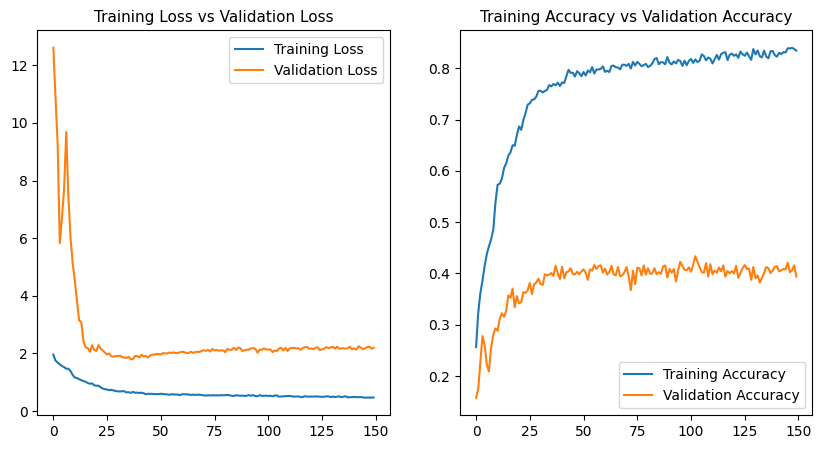

11/11 [==============================] - 427s 43s/step - loss: 2.2558 - accuracy: 0.4186
Loss 2.2557597160339355
Accuracy 0.41857144236564636


In [ ]:
plot_loss_accuracy(history_15,model_15)

In [ ]:
classif_report(model_15, testing, training)

<ipython-input-9-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


11/11 [==============================] - 3s 166ms/step
              precision    recall  f1-score   support

       angry       0.31      0.29      0.30       100
     disgust       0.82      0.54      0.65       100
        fear       0.32      0.33      0.32       100
       happy       0.49      0.53      0.51       100
     neutral       0.30      0.33      0.32       100
         sad       0.35      0.39      0.37       100
    surprise       0.59      0.62      0.60       100

    accuracy                           0.43       700
   macro avg       0.45      0.43      0.44       700
weighted avg       0.45      0.43      0.44       700



# KNN ( Approach 16)


## KNN intantiation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_16 = KNeighborsClassifier(n_neighbors=1)



## KNN 16 IMAGE GENERATION / RESHAPE PREPARATION

In [ ]:
generator_knn = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,     #! 
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,   #!
    vertical_flip=False,    #!
    rescale=1.0/255,        #!
    preprocessing_function= None, #cropface,
    data_format="channels_last", #(samples, height, width, channels)
    validation_split=None,   #!
    #interpolation_order=1, # Not to use with tensorflow --version<=2.7
    dtype=None
)

In [ ]:
training_knn = generator_knn.flow_from_directory(
    path_FER + 'train/',
    target_size=IMG_SIZE[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    #subset='training'
)

testing_knn = generator_knn.flow_from_directory(
    path_FER + 'test/',
    target_size=IMG_SIZE[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=0,
    shuffle=False,
)


Found 6436 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:
def gettensors_flowfromdirectory(flowfromdir):
  flowfromdir.reset()
  X_train, y_train = next(flowfromdir) #get the 1st batch
  # loop = 0
  for i in tqdm.tqdm(range(int(flowfromdir.n/batch_size)-1)):  # get the remaining batches
    img, label = next(flowfromdir)  
    X_train = np.append(X_train, img, axis=0 ) #All images values are appended to the next row of the array X_train
    y_train = np.append(y_train, label, axis=0) #All images values are appended to the next row of the array y_train
    #loop+=1
    # if loop ==3:
    #   break
  #print(X_train.shape, y_train.shape)
  return X_train, y_train



In [ ]:
X_train, y_train = gettensors_flowfromdirectory(training_knn)
X_test, y_test = gettensors_flowfromdirectory(testing_knn)

100%|██████████| 9/9 [00:01<00:00,  6.06it/s]


In [ ]:
X_train.shape
y_train.shape

(6400, 7)

In [ ]:
def reshape4D_in2D(dataset4D):
  nsamples, nx, ny, channels = dataset4D.shape
  dataset_2D = dataset4D.reshape(nsamples,(nx*ny*channels))
  return dataset_2D
#X_train[:2].reshape
#d2_X_train.shape
d2_X_train = reshape4D_in2D(X_train)
d2_X_testing = reshape4D_in2D(X_test)

print(d2_X_train.shape)
print(d2_X_testing.shape)

(6400, 6912)
(640, 6912)


## KNN 16 FIT

In [ ]:
# KNN classifier does not have any specialized training phase as it uses 
# all the training samples for classification and simply stores the results in memory
knn = knn_model_16.fit(d2_X_train,y_train ) 


## KNN 16 SCORE

In [ ]:
y_pred = knn.predict(d2_X_testing)

In [ ]:
y_pred

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
knn.score(d2_X_testing, y_test)

0.2421875

In [ ]:
testing_knn.reset()

test_class_indices=np.argmax(y_test,axis=1)
predicted_class_indices=np.argmax(y_pred,axis=1)

emo_labels = (training_knn.class_indices)

print(classification_report(test_class_indices, predicted_class_indices, target_names = emo_labels))

              precision    recall  f1-score   support

       angry       0.21      0.16      0.18       100
     disgust       0.42      0.38      0.40       100
        fear       0.27      0.24      0.25       100
       happy       0.24      0.23      0.23       100
     neutral       0.20      0.29      0.24       100
         sad       0.24      0.17      0.20       100
    surprise       0.11      0.20      0.14        40

    accuracy                           0.24       640
   macro avg       0.24      0.24      0.24       640
weighted avg       0.25      0.24      0.24       640



In [ ]:
#knn_model_16.score(X_test, y_test)
classif_report(knn_model_16, testing, training)

In [ ]:
# from sklearn.model_selection import cross_val_score
# cv2 = cross_val_score(KNeighborsClassifier(1), validation, cv=2) #default cv is 5



# MODEL 17 

Training the entire MobileNetV2 - GRAYSCALE ONLY

## MODEL 17 LAYERS

In [ ]:
MNV2_17 = MobileNetV2(input_shape=IMG_SIZE[:2]+[1],
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)

for layer in MNV2_17.layers:
  layer.trainable =  True

In [ ]:
with tf.device(device_name):
  model_17 = Model(inputs=MNV2_17.input, outputs=MNV2_17.output)
      
  model_17.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_17.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   288         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

## MODEL 17 FIT

In [ ]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_17 = model_17.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples

Epoch 1/150
81/81 [==============================] - 71s 308ms/step - loss: 2.0369 - accuracy: 0.1651 - val_loss: 1.9423 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 2/150
81/81 [==============================] - 15s 180ms/step - loss: 1.9469 - accuracy: 0.1701 - val_loss: 1.9383 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 3/150
81/81 [==============================] - 17s 211ms/step - loss: 1.9340 - accuracy: 0.1847 - val_loss: 1.9358 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 4/150
81/81 [==============================] - 14s 177ms/step - loss: 1.9265 - accuracy: 0.1971 - val_loss: 1.9301 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 5/150
81/81 [==============================] - 17s 205ms/step - loss: 1.9158 - accuracy: 0.1997 - val_loss: 1.9285 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 6/150
81/81 [==============================] - 17s 209ms/step - loss: 1.9069 - accuracy: 0.2096 - val_loss: 1.9283 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 7/150
81/81 [==============================] - 25s 3

In [ ]:
#Model: save/loading
pickle.dump(model_17, open(path_models+'model_17_pckl.pkl', 'wb'))
model_17.save(path_models+'model_17')
#model_17 = tf.keras.models.load_model(path_models+'model_17')

#weights training history: save/load
np.save(os.path.join(path_models,'history_17.npy'),history_17.history)
#history_17=np.load(os.path.join(path_models,'history_17.npy'),allow_pickle='TRUE').item()

## MODEL 17 PLOTS

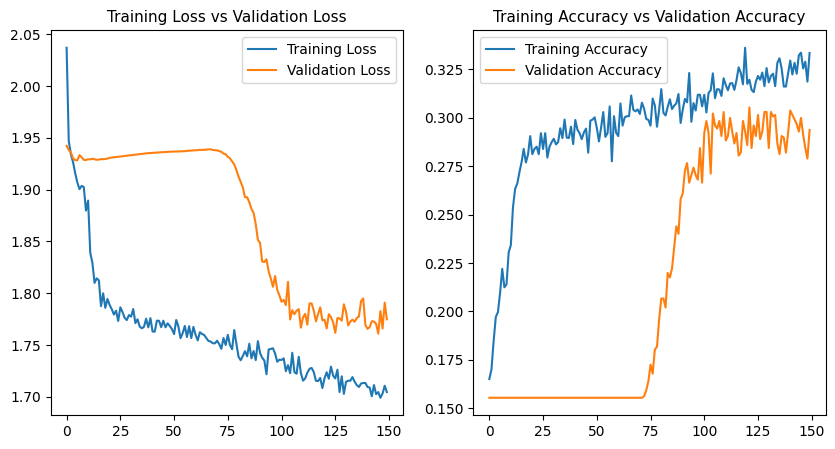

11/11 [==============================] - 3s 287ms/step - loss: 1.8286 - accuracy: 0.2943
Loss 1.8285654783248901
Accuracy 0.29428571462631226


In [ ]:
plot_loss_accuracy(history_17,model_17)

In [ ]:
classif_report(model_17, testing, training)

<ipython-input-84-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


11/11 [==============================] - 4s 229ms/step
              precision    recall  f1-score   support

       angry       0.22      0.15      0.18       100
     disgust       0.50      0.07      0.12       100
        fear       0.26      0.17      0.20       100
       happy       0.30      0.36      0.33       100
     neutral       0.23      0.31      0.26       100
         sad       0.24      0.39      0.30       100
    surprise       0.48      0.65      0.55       100

    accuracy                           0.30       700
   macro avg       0.32      0.30      0.28       700
weighted avg       0.32      0.30      0.28       700



# MODEL 18

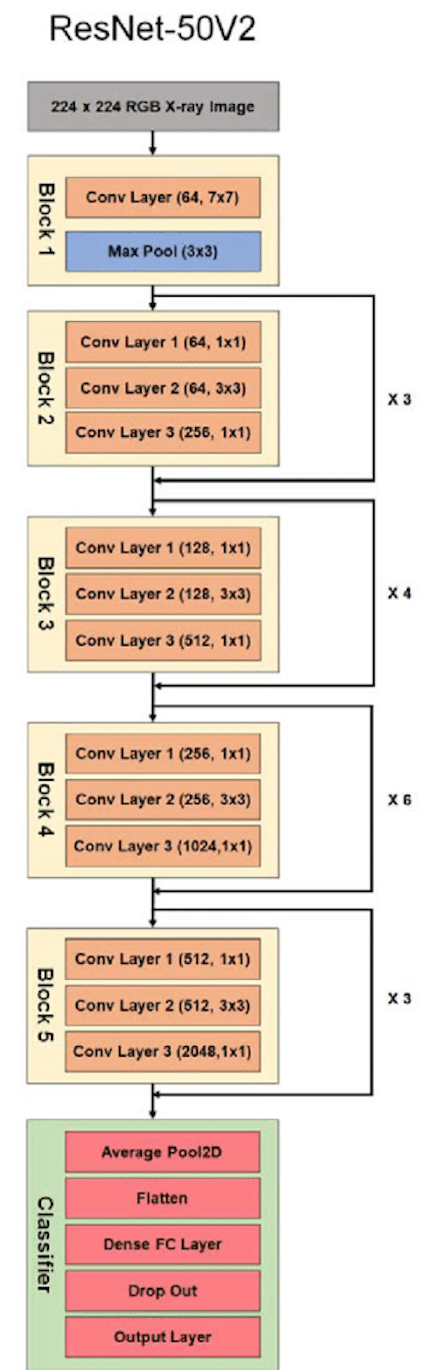

In [ ]:
RSNT50V2 = ResNet50V2(weights=None, include_top=False, input_shape=IMG_SIZE)


for layer in RSNT50V2.layers:
  layer.trainable =  True

x = RSNT50V2.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)




In [ ]:
with tf.device(device_name):
  model_18 = tf.keras.models.Model(inputs=RSNT50V2.input, outputs=output)
      
  model_18.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_18.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 26, 26, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
len(model_18.layers)

195

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_18 = model_18.fit(training, 
                    epochs=epochs, 
                    #steps_per_epoch = training.samples,
                    validation_data=validation,
                    verbose=1,
                    callbacks=[reduce_lr])
                    #validation_steps=validation.samples

Epoch 1/100
81/81 [==============================] - 1274s 15s/step - loss: 2.4429 - accuracy: 0.1713 - val_loss: 1.9264 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 2/100
81/81 [==============================] - 18s 228ms/step - loss: 1.9162 - accuracy: 0.1775 - val_loss: 1.9268 - val_accuracy: 0.1593 - lr: 0.0010
Epoch 3/100
81/81 [==============================] - 18s 223ms/step - loss: 1.9006 - accuracy: 0.1950 - val_loss: 1.9343 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 4/100
81/81 [==============================] - 18s 220ms/step - loss: 1.8958 - accuracy: 0.2113 - val_loss: 1.9020 - val_accuracy: 0.1943 - lr: 0.0010
Epoch 5/100
81/81 [==============================] - 20s 245ms/step - loss: 1.8889 - accuracy: 0.2132 - val_loss: 1.8869 - val_accuracy: 0.2106 - lr: 0.0010
Epoch 6/100
81/81 [==============================] - 18s 219ms/step - loss: 1.8784 - accuracy: 0.2245 - val_loss: 1.8743 - val_accuracy: 0.2230 - lr: 0.0010
Epoch 7/100
81/81 [==============================] - 18s 2

In [ ]:
#Model: save/loading
pickle.dump(model_18, open(path_models+'model_18_pckl.pkl', 'wb'))
model_18.save(path_models+'model_18')
#model_18 = tf.keras.models.load_model(path_models+'model_18')

#weights training history: save/load
np.save(os.path.join(path_models,'history_18.npy'),history_18.history)
#history_18=np.load(os.path.join(path_models,'history_18.npy'),allow_pickle='TRUE').item()

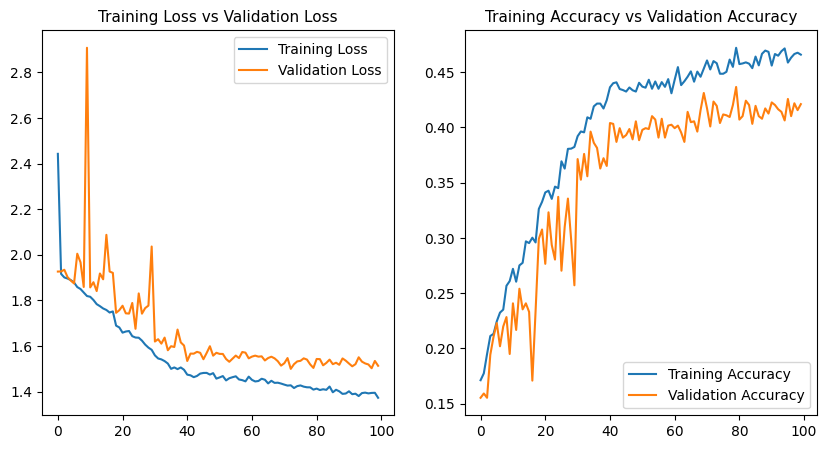

11/11 [==============================] - 154s 15s/step - loss: 1.5465 - accuracy: 0.4229
Loss 1.5464918613433838
Accuracy 0.4228571355342865


In [ ]:
plot_loss_accuracy(history_18,model_18)

In [ ]:
classif_report(model_18, testing, training)

<ipython-input-10-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


11/11 [==============================] - 3s 151ms/step
              precision    recall  f1-score   support

       angry       0.27      0.41      0.32       100
     disgust       0.56      0.35      0.43       100
        fear       0.24      0.12      0.16       100
       happy       0.59      0.67      0.63       100
     neutral       0.35      0.33      0.34       100
         sad       0.29      0.34      0.31       100
    surprise       0.64      0.70      0.67       100

    accuracy                           0.42       700
   macro avg       0.42      0.42      0.41       700
weighted avg       0.42      0.42      0.41       700



# ------------------------ POST PROJECT IMPROVEMENTS ------------------------ 

UPDATE TO DATASET: 
- INPUT IMAGES RESOLUTION : IMG_SIZE = 224 * 224 * 3
- INCREASED BATCH_SIZE = 150
- REUSE OF MOBILENETV2

In [ ]:
print(IMG_SIZE)
print(batch_size)

[224, 224, 3]
150


In [ ]:
MNV2 = MobileNetV2(input_shape=IMG_SIZE,
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=num_classes,
    classifier_activation="softmax",
)

for layer in MNV2.layers:
  layer.trainable =  True


In [ ]:
with tf.device(device_name):
  model_19 = Model(inputs=MNV2.input, outputs=MNV2.output)
      
  model_19.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_19.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
history_19 = model_19.fit(training, 
                          batch_size=batch_size,
                          epochs=epochs,
                          #steps_per_epoch = training.samples,
                          validation_data=validation,
                          verbose=1,
                          callbacks=[reduce_lr])
                          #validation_steps=validation.samples

Epoch 1/100
35/35 [==============================] - 1386s 38s/step - loss: 1.9848 - accuracy: 0.1771 - val_loss: 1.9447 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 2/100
35/35 [==============================] - 91s 3s/step - loss: 1.9151 - accuracy: 0.2090 - val_loss: 1.9448 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 3/100
35/35 [==============================] - 90s 3s/step - loss: 1.9153 - accuracy: 0.2154 - val_loss: 1.9460 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 4/100
35/35 [==============================] - 90s 3s/step - loss: 1.8855 - accuracy: 0.2278 - val_loss: 1.9457 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 5/100
35/35 [==============================] - 91s 3s/step - loss: 1.8725 - accuracy: 0.2350 - val_loss: 1.9467 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 6/100
35/35 [==============================] - 90s 3s/step - loss: 1.8530 - accuracy: 0.2525 - val_loss: 1.9508 - val_accuracy: 0.1554 - lr: 0.0010
Epoch 7/100
35/35 [==============================] - 91s 3s/step - loss: 

In [ ]:
#Model: save/loading
pickle.dump(model_19, open(path_models+'model_19_pckl.pkl', 'wb'))
model_19.save(path_models+'model_19')
#model_19 = tf.keras.models.load_model(path_models+'model_19')

#weights training history: save/load
np.save(os.path.join(path_models,'history_19.npy'),history_19.history)
#history_19=np.load(os.path.join(path_models,'history_19.npy'),allow_pickle='TRUE').item()

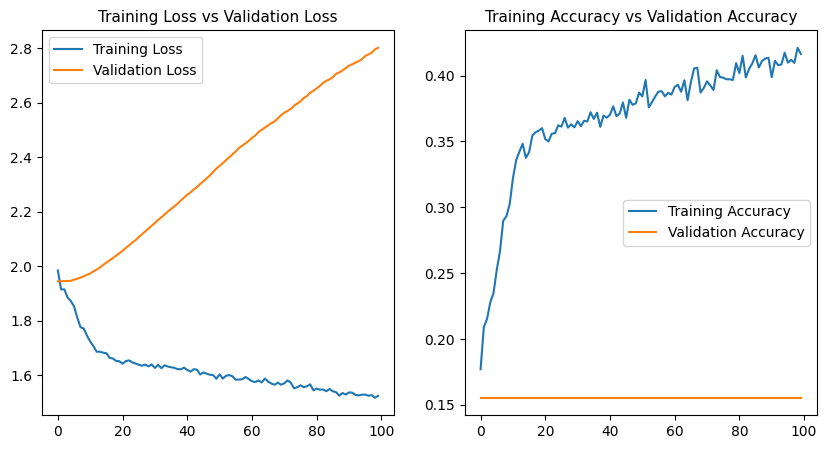

4/5 [=======================>......] - ETA: 34s - loss: 2.2252 - accuracy: 0.1667     

In [ ]:
plot_loss_accuracy(history_19,model_19)

In [ ]:
classif_report(model_19,testing,training)

# EMOTIONNET ++ 

BEST SCORE: 0.4857
4 CONV + 1 Flat + 2FC
1) 2 CONV2D + batchNorm + MaxPool
2) 2 CONV2D + batchNorm + MaxPool 
3) 3 CONV2D + batchNorm + MaxPool
4) 3 CONV2D +  MaxPool

2nd SCORE : 0.47 
3 CONV + 1FLAT + 2FC
1) 2 CONV2D + batchNorm + MaxPool
2) 2 Conv2D + BatchNorm + MaxPool
3) 3 conv2D + batchNorm + MaxPool

In [ ]:
from tensorflow.keras import regularizers #NOT GOOD: #kernel_regularizer=regularizers.L1(0.001),

# Define the model
emotionNet = Sequential()

# Add the first convolutional block
emotionNet.add(Conv2D(14, (5, 5), activation='relu', input_shape=IMG_SIZE[:2]+[1], padding='same'))
emotionNet.add(Conv2D(14, (3, 3), activation='relu', padding='same'))
emotionNet.add(BatchNormalization())
emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the second convolutional block
emotionNet.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
emotionNet.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
emotionNet.add(BatchNormalization())
emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the third convolutional block
emotionNet.add(Conv2D(56, (3, 3), activation='relu', padding='same'))
emotionNet.add(Conv2D(56, (3, 3), activation='relu', padding='same'))
emotionNet.add(Conv2D(56, (3, 3), activation='relu', padding='same'))
emotionNet.add(BatchNormalization())
emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Add the fourth convolutional block
emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# # Add the fifth convolutional block
# emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# emotionNet.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the output from the last convolutional block
emotionNet.add(Flatten())

# Add the first fully connected layer
emotionNet.add(Dense(196, activation='relu'))
#emotionNet.add(Dropout(0.5))
# Add the second fully connected layer
emotionNet.add(Dense(196, activation='relu'))


# Add the output layer
emotionNet.add(Dense(num_classes, activation='softmax'))




In [ ]:
with tf.device(device_name):
  model_20 = Model(inputs=emotionNet.input, outputs=emotionNet.output)
      
  model_20.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )
  model_20.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 14)        364       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 14)        1778      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 14)       56        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 14)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 28)        3556  

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0000001)
history_20 = model_20.fit(training, 
                          batch_size=batch_size,
                          epochs=epochs,
                          #steps_per_epoch = training.samples,
                          validation_data=validation,
                          verbose=1,
                          callbacks=[reduce_lr])
                          #validation_steps=validation.samples

Epoch 1/90
80/80 [==============================] - 1962s 24s/step - loss: 1.8916 - accuracy: 0.2122 - val_loss: 1.8715 - val_accuracy: 0.1756 - lr: 0.0010
Epoch 2/90
80/80 [==============================] - 27s 338ms/step - loss: 1.7775 - accuracy: 0.2665 - val_loss: 2.2157 - val_accuracy: 0.1894 - lr: 0.0010
Epoch 3/90
80/80 [==============================] - 27s 334ms/step - loss: 1.7106 - accuracy: 0.2962 - val_loss: 1.9798 - val_accuracy: 0.1803 - lr: 0.0010
Epoch 4/90
80/80 [==============================] - 27s 332ms/step - loss: 1.6682 - accuracy: 0.3359 - val_loss: 2.0127 - val_accuracy: 0.1823 - lr: 0.0010
Epoch 5/90
80/80 [==============================] - 26s 330ms/step - loss: 1.6037 - accuracy: 0.3777 - val_loss: 1.9591 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 6/90
80/80 [==============================] - 26s 326ms/step - loss: 1.5269 - accuracy: 0.4182 - val_loss: 1.6865 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 7/90
80/80 [==============================] - 27s 333ms/st

In [ ]:
#Model: save/loading
pickle.dump(model_20, open(path_models+'model_20_pckl.pkl', 'wb'))
model_20.save(path_models+'model_20')
#model_20 = tf.keras.models.load_model(path_models+'model_20')

#weights training history: save/load
np.save(os.path.join(path_models,'history_20.npy'),history_20.history)
#history_20=np.load(os.path.join(path_models,'history_20.npy'),allow_pickle='TRUE').item()

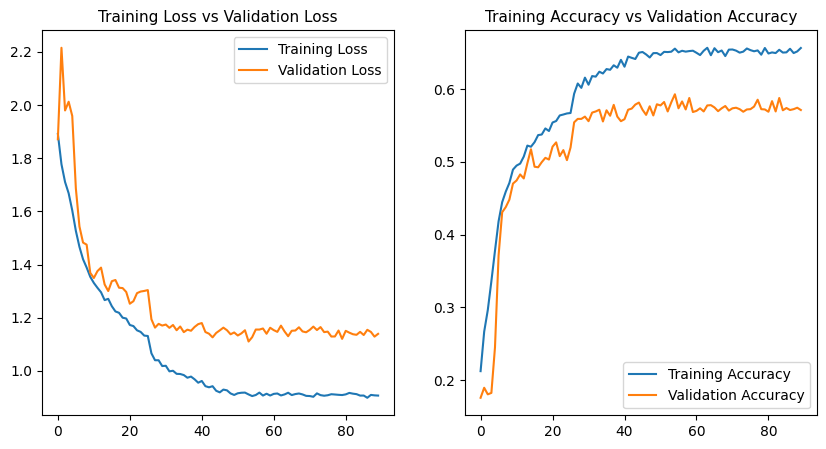

4/4 [==============================] - 77s 25s/step - loss: 1.3004 - accuracy: 0.5479
Loss 1.3003509044647217
Accuracy 0.5478615164756775


In [ ]:
plot_loss_accuracy(history_20,model_20)

In [ ]:
classif_report(model_20,testing,training)

<ipython-input-16-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 1s 228ms/step
              precision    recall  f1-score   support

       angry       0.35      0.46      0.40        67
     disgust       0.84      0.34      0.48        80
        fear       0.29      0.25      0.27        53
       happy       0.77      0.88      0.82        84
     neutral       0.48      0.62      0.54        78
         sad       0.35      0.34      0.34        56
    surprise       0.71      0.74      0.72        73

    accuracy                           0.54       491
   macro avg       0.54      0.52      0.51       491
weighted avg       0.57      0.54      0.54       491



KERAS-TUNER on model_20

In [ ]:
def model_instrumentation(num_classes, units, activation, dropout, lr=None ):
  with tf.device(device_name):
    # Define the model
    emotionNet = Sequential()

    # Add the first convolutional block # 14
    emotionNet.add(Conv2D(units[0], (5, 5), activation='relu', input_shape=IMG_SIZE[:2]+[1], padding='same'))
    emotionNet.add(Conv2D(units[0], (3, 3), activation='relu', padding='same'))
    emotionNet.add(BatchNormalization())
    emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Add the second convolutional block # 28
    emotionNet.add(Conv2D(units[1], (3, 3), activation='relu', padding='same'))
    emotionNet.add(Conv2D(units[1], (3, 3), activation='relu', padding='same'))
    emotionNet.add(BatchNormalization())
    emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Add the third convolutional block # 56
    emotionNet.add(Conv2D(units[2], (3, 3), activation='relu', padding='same'))
    emotionNet.add(Conv2D(units[2], (3, 3), activation='relu', padding='same'))
    emotionNet.add(Conv2D(units[2], (3, 3), activation='relu', padding='same'))
    emotionNet.add(BatchNormalization())
    emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    if dropout:
          emotionNet.add(Dropout(0.2))

    # # Add the fourth convolutional block #512
    emotionNet.add(Conv2D(units[3], (3, 3), activation='relu', padding='same'))
    emotionNet.add(Conv2D(units[3], (3, 3), activation='relu', padding='same'))
    emotionNet.add(Conv2D(units[3], (3, 3), activation='relu', padding='same'))
    emotionNet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the output from the last convolutional block
    emotionNet.add(Flatten())

    # Add the first fully connected layer # 196
    emotionNet.add(Dense(units[4], activation='relu'))

    # Add the second fully connected layer
    emotionNet.add(Dense(units[4], activation='relu'))

    # Add the output layer
    emotionNet.add(Dense(num_classes, activation='softmax'))

    emotionNet.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
    )

    return emotionNet


In [ ]:
def build_model(hp):
    
    L_0 = hp.Int("L_0", min_value=1, max_value=28, step=1) # 14
    L_1 = hp.Int("L_1", min_value=14, max_value=49, step=7) # 28
    L_2 = hp.Int("L_2", min_value=28, max_value=63, step=7) # 56
    L_3 = hp.Int("L_3", min_value=63, max_value=961, step=21) # FC : 512
    FC_4 = hp.Int("FC_4", min_value=49, max_value=784, step=21) # 196
    
    
    units = [L_0,L_1, L_2, L_3, FC_4]
    
    
    dropout = hp.Boolean("dropout")
    
    
    

    model = model_instrumentation(num_classes, units=units, activation=None, dropout=dropout, lr=None)

    model.summary()

    return model

In [ ]:
# Searching for the best model parameters
build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=2,             
    executions_per_trial=2,
    overwrite=False,
    directory=path_models+"tuner",
    project_name="results_21",
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 48, 48, 1)         26        
                                                                 
 conv2d_42 (Conv2D)          (None, 48, 48, 1)         10        
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 1)        4         
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 14)        140       
                                                                 
 conv2d_44 (Conv2D)          (None, 24, 24, 14)       

In [ ]:
# SEARCH PARAMETERS RECAP
tuner.search_space_summary()

Search space summary
Default search space size: 6
L_0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 28, 'step': 1, 'sampling': 'linear'}
L_1 (Int)
{'default': None, 'conditions': [], 'min_value': 14, 'max_value': 49, 'step': 7, 'sampling': 'linear'}
L_2 (Int)
{'default': None, 'conditions': [], 'min_value': 28, 'max_value': 63, 'step': 7, 'sampling': 'linear'}
L_3 (Int)
{'default': None, 'conditions': [], 'min_value': 63, 'max_value': 961, 'step': 21, 'sampling': 'linear'}
FC_4 (Int)
{'default': None, 'conditions': [], 'min_value': 49, 'max_value': 784, 'step': 21, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}


In [ ]:
tuner.search(training, epochs=epochs, validation_data=validation)

Trial 2 Complete [01h 29m 35s]
val_accuracy: 0.5785433053970337

Best val_accuracy So Far: 0.5785433053970337
Total elapsed time: 05h 37m 47s


In [ ]:
best_params_21 = tuner.get_best_hyperparameters()[0]
best_model_21 = tuner.get_best_models()[0]
for p,v in best_params_21.values.items():
  print(p,' : ', v, '\n')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 14)        2030      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 14)        1

In [ ]:
#best_model_21.save(path_models+'model_21')
#or load
best_model_21 = tf.keras.models.load_model(path_models+'model_21')


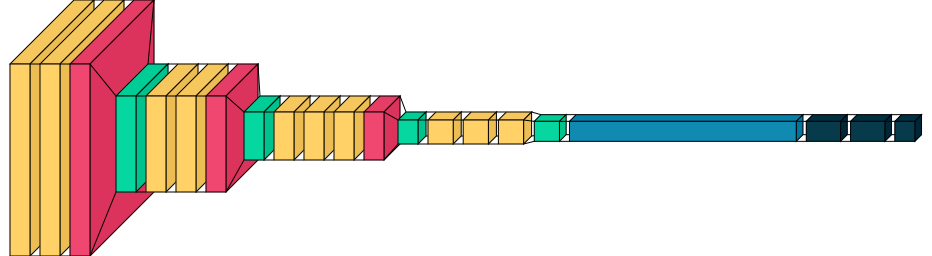

In [ ]:
visualkeras.layered_view(best_model_21)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0000001)
history_21 = best_model_21.fit(training, 
                          batch_size=batch_size,
                          epochs=epochs,
                          #steps_per_epoch = training.samples,
                          validation_data=validation,
                          verbose=1,
                          callbacks=[reduce_lr])
                          #validation_steps=validation.samples

Epoch 1/90
124/124 [==============================] - 5148s 41s/step - loss: 0.8957 - accuracy: 0.6655 - val_loss: 1.1204 - val_accuracy: 0.6030 - lr: 0.0010
Epoch 2/90
124/124 [==============================] - 40s 326ms/step - loss: 0.8763 - accuracy: 0.6716 - val_loss: 1.0806 - val_accuracy: 0.6129 - lr: 0.0010
Epoch 3/90
124/124 [==============================] - 40s 327ms/step - loss: 0.8734 - accuracy: 0.6731 - val_loss: 1.1574 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 4/90
124/124 [==============================] - 40s 324ms/step - loss: 0.8679 - accuracy: 0.6760 - val_loss: 1.1069 - val_accuracy: 0.6113 - lr: 0.0010
Epoch 5/90
124/124 [==============================] - 40s 326ms/step - loss: 0.8704 - accuracy: 0.6765 - val_loss: 1.1300 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 6/90
124/124 [==============================] - 40s 325ms/step - loss: 0.8532 - accuracy: 0.6803 - val_loss: 1.1411 - val_accuracy: 0.6012 - lr: 0.0010
Epoch 7/90
124/124 [==============================] 

In [ ]:
#Model: save/loading
#pickle.dump(best_model_21, open(path_models+'model_21_pckl.pkl', 'wb'))
#best_model_21.save(path_models+'model_21')
best_model_21 = tf.keras.models.load_model(path_models+'model_21')

#weights training history: save/load
#np.save(os.path.join(path_models,'history_21.npy'),history_21.history)
history_21=np.load(os.path.join(path_models,'history_21.npy'),allow_pickle='TRUE').item()

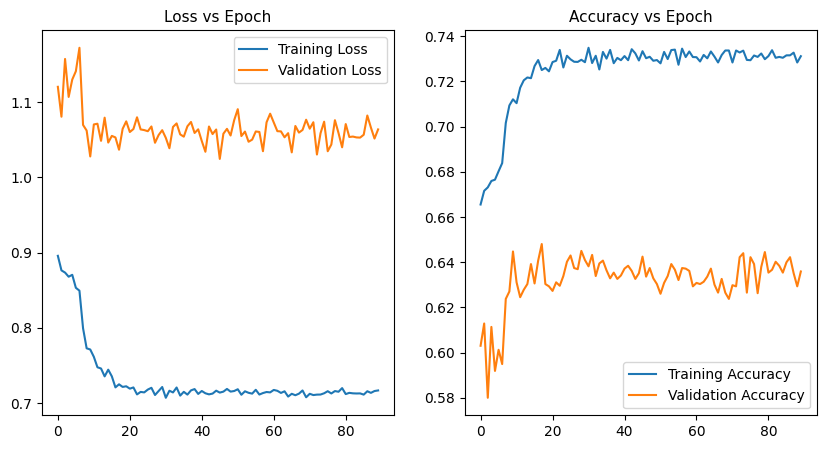

4/4 [==============================] - 82s 25s/step - loss: 1.4139 - accuracy: 0.5560
Loss 1.413893222808838
Accuracy 0.5560081601142883


In [ ]:
plot_loss_accuracy(history_21,best_model_21)

In [ ]:
classif_report(best_model_21,testing,training)

<ipython-input-16-b22a086c7c24>:31: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(testing,verbose=1)


4/4 [==============================] - 1s 259ms/step
              precision    recall  f1-score   support

       angry       0.42      0.51      0.46        67
     disgust       1.00      0.47      0.64        80
        fear       0.43      0.40      0.41        53
       happy       0.80      0.88      0.84        84
     neutral       0.56      0.71      0.62        78
         sad       0.41      0.52      0.46        56
    surprise       0.79      0.67      0.73        73

    accuracy                           0.61       491
   macro avg       0.63      0.59      0.59       491
weighted avg       0.66      0.61      0.62       491



In [ ]:
# import tensorflow.lite as tflite
# # Load the model from a file
# interpreter = tflite.Interpreter(model_path='model.tflite')

# # Allocate memory for the model's input and output tensors
# interpreter.allocate_tensors()

# # Get the input and output tensors
# input_tensor = interpreter.get_input_details()[0]['index']
# output_tensor = interpreter.get_output_details()[0]['index']

# # Perform inference on a sample input
# input_data = ...
# interpreter.set_tensor(input_tensor, input_data)
# interpreter.invoke()
# output_data = interpreter.get_tensor(output_tensor)


In [ ]:
# Load the saved model
model = tf.saved_model.load('path/to/model')

# Convert the model to the TFLite format
converter = tf.lite.TFLiteConverter.from_saved_model('path/to/model')
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)